# Problem - 1

### 1.	An analytics company has been tasked with the crucial job of finding out what factors affect a startup company and if it will be profitable or not. For this, they have collected some historical data and would like to apply multilinear regression to derive brief insights into their data. Predict profit, given different attributes for various startup companies.

In [93]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [94]:
import warnings
warnings.filterwarnings('ignore')

In [95]:
#reading the data into python
startup = pd.read_csv(r"D:\360 Data Science 360DigiTMG\Day31-Multiple Linear Regression\Datasets_MLR\50_Startups.csv")
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [96]:
#shape of the data
startup.shape

(50, 5)

In [97]:
#rename the columns
startup = startup.rename({'R&D Spend':'R&D_Spend',"Marketing Spend":"Marketing_Spend"},axis=1)

In [98]:
#cganged name of the columns
startup.head()

,R&D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [99]:
#checking for null values
startup.isnull().sum()

R&D_Spend          0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

In [100]:
#checking for duplicates
dup = startup.duplicated()
sum(dup)

0

In [101]:
#eda or statistical anlysis
startup.describe()

,R&D_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [102]:
print(startup.corr())

                 R&D_Spend  Administration  Marketing_Spend    Profit
R&D_Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing_Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


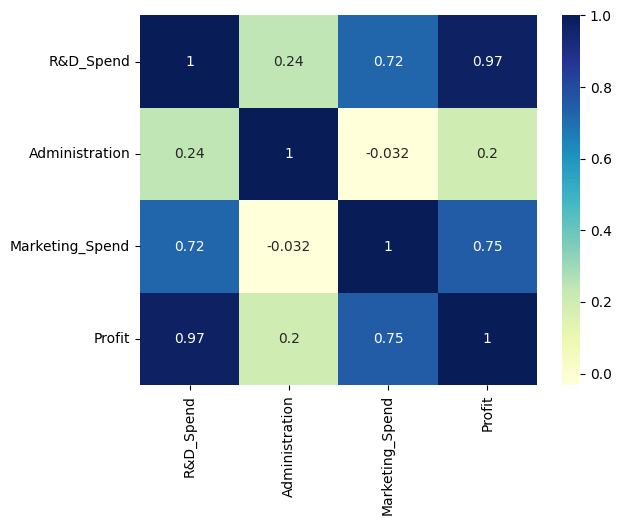

In [103]:
dataplot = sns.heatmap(startup.corr(), annot = True, cmap = "YlGnBu")

In [104]:
df = startup[["R&D_Spend", "Administration", "Marketing_Spend", "Profit"]].dropna()

Z = add_constant(df)

vif = pd.Series([variance_inflation_factor(Z.values, i) for i in range(Z.shape[1])], index=Z.columns)
vif

const              57.375756
R&D_Spend          19.563001
Administration      1.182146
Marketing_Spend     2.465332
Profit             20.302917
dtype: float64

In [105]:
df_cor = df.corr()
pd.DataFrame(np.linalg.inv(df.corr().values), index = df_cor.index, columns=df_cor.columns)

,R&D_Spend,Administration,Marketing_Spend,Profit
R&D_Spend,19.563001,-1.002799,-0.270173,-18.629548
Administration,-1.002799,1.182146,0.481290,0.378455
Marketing_Spend,-0.270173,0.481290,2.465332,-1.677242
Profit,-18.629548,0.378455,-1.677242,20.302917


In [106]:
# Seperating input and output variables 
X = pd.DataFrame(startup.iloc[:, 0:4])
y = pd.DataFrame(startup.iloc[:, 4])

In [107]:
# checking unique values
X["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [108]:
X.head()

,R&D_Spend,Administration,Marketing_Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [109]:
#seggrating nom numeric features
cate_feat = X.select_dtypes(include=['object']).columns
print(cate_feat)

print('\n')

#seggrating numeric features
num_feat = X.select_dtypes(exclude=['object']).columns
print(num_feat)

Index(['State'], dtype='object')


Index(['R&D_Spend', 'Administration', 'Marketing_Spend'], dtype='object')


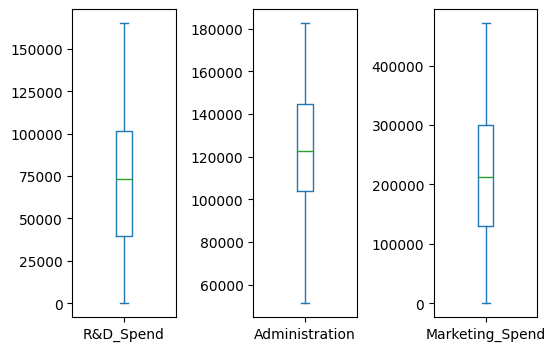

In [110]:
#checking for outliers
X.plot(kind='box',subplots=True,sharey=False, figsize=(6,4))
plt.subplots_adjust(wspace=0.75)
plt.show()

In [111]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

import joblib,pickle  

In [112]:
#scaling numerical features with minmaxscaler

scale_pipeline = Pipeline(steps=[('scale', MinMaxScaler())])
scale_col_transfer = ColumnTransformer(transformers=[('scale',scale_pipeline, num_feat)])

# Fit the scaling pipeline to input features
scale = scale_col_transfer.fit(X)

#save minmax scaler pipeline
joblib.dump(scale,'minmax')

['minmax']

In [113]:
scaled_data = pd.DataFrame(scale.transform(X))
scaled_data.head()

,0,1,2
0,1.000000,0.651744,1.000000
1,0.983359,0.761972,0.940893
2,0.927985,0.379579,0.864664
3,0.873136,0.512998,0.812235
4,0.859438,0.305328,0.776136


In [114]:
#encoding the catregorical fetures using Onehotencoder
encode_pipeline = Pipeline([('onehot',OneHotEncoder())])
encode_col_transfer = ColumnTransformer([('categorical', encode_pipeline, cate_feat)])

# Fit the scaling pipeline to input features
encode = encode_col_transfer.fit(X)  # Works with categorical features only

#save encoding model
joblib.dump(encode, 'encoding')

['encoding']

In [120]:
encode_data = pd.DataFrame(encode.transform(X))
encode_data.head()

,0,1,2
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0


In [119]:
#concatenated data will have new sequential index
clean_data = pd.concat([scaled_data,encode_data], axis=1, ignore_index=True)
clean_data.head()

,0,1,2,3,4,5
0,1.000000,0.651744,1.000000,0.0,0.0,1.0
1,0.983359,0.761972,0.940893,1.0,0.0,0.0
2,0.927985,0.379579,0.864664,0.0,1.0,0.0
3,0.873136,0.512998,0.812235,0.0,0.0,1.0
4,0.859438,0.305328,0.776136,0.0,1.0,0.0


In [121]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [122]:
# VIF for clean Data
P = add_constant(clean_data)
vif=pd.Series([variance_inflation_factor(P.values, i) for i in range(P.shape[1])], index=P.columns)
vif

const    0.000000
0        2.495511
1        1.177766
2        2.416797
3             inf
4             inf
5             inf
dtype: float64

In [123]:
df_cor =clean_data.corr() 
pd.DataFrame(np.linalg.inv(clean_data.corr().values), index=df_cor.index, columns=df_cor.columns)

,0,1,2,3,4,5
0,2.495511,-0.663122,-1.845386,4.325106e-01,4.338842e-01,2.722449e-01
1,-0.663122,1.177766,0.527447,2.896378e-04,-3.888477e-02,1.688624e-02
2,-1.845386,0.527447,2.416797,-3.635583e-02,-3.272025e-01,-3.635583e-02
3,0.334778,0.004175,-0.040775,-1.501200e+15,-1.478279e+15,-1.501200e+15
4,0.390134,-0.038434,-0.348148,-1.478279e+15,-1.455709e+15,-1.478279e+15
5,0.208333,0.020833,-0.041667,-1.501200e+15,-1.478279e+15,-1.501200e+15


In [124]:
type(encode_data)

pandas.core.frame.DataFrame

In [125]:
import os
os.getcwd()

'C:\\Users\\J. Berger Perkins\\anaconda3'

In [127]:
# Splitting data into training and testing data set

X_train, X_test, Y_train, Y_test = train_test_split(clean_data, y, test_size = 0.2, 
                                                    random_state = 0) 

In [129]:
#model building without cv
multilinear = LinearRegression()
model = multilinear.fit(X_train,Y_train)

#predicting upon X_test
y_pred = model.predict(X_test)

#checking the accuracy by r2 score
accuracy = r2_score(Y_test,y_pred)
accuracy

0.9347068473282424

In [130]:
#scores with cv   # k-fold CV (using all variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, Y_train, scoring='r2', cv=5)
scores   

array([0.64120447, 0.88536669, 0.90980771, 0.8961349 , 0.97415038])

In [131]:
#scores with K-fold
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, Y_train, scoring='r2', cv=folds)
scores   

array([0.90271099, 0.9552152 , 0.61917109, 0.93067352, 0.87961065])

In [132]:
# can tune other metrics, such as MSE
scores = cross_val_score(lm, X_train, Y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-2.41561139e+08, -9.85464665e+07, -1.84071510e+08, -1.14662125e+08,
       -8.03878333e+07])

In [134]:
#modelbuilding with cv and RFE

# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

In [135]:
# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 10))}]

In [136]:
# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, Y_train)
#Recursive feature elimination
rfe = RFE(lm)             

In [137]:
# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

In [138]:
# fit the model
model_cv.fit(X_train, Y_train)   

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
             return_train_score=True, scoring='r2', verbose=1)

In [139]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015302,0.004567,0.005715,0.003058,1,{'n_features_to_select': 1},0.916915,0.957506,0.629897,0.988109,...,0.876484,0.127786,2,0.947873,0.927935,0.948934,0.932744,0.966730,0.944843,0.013691
1,0.012152,0.003742,0.003054,0.003748,2,{'n_features_to_select': 2},0.917800,0.959044,0.761350,0.937486,...,0.891245,0.069896,1,0.952978,0.934588,0.951749,0.944740,0.968609,0.950533,0.011154
2,0.007876,0.005832,0.003101,0.002999,3,{'n_features_to_select': 3},0.913597,0.959685,0.643111,0.930117,...,0.867110,0.114331,3,0.953399,0.934837,0.952858,0.945857,0.969264,0.951243,0.011227
3,0.005938,0.005806,0.002745,0.004497,4,{'n_features_to_select': 4},0.913949,0.955118,0.617372,0.930507,...,0.859104,0.123401,5,0.953406,0.935215,0.953205,0.945864,0.971295,0.951797,0.011789
4,0.008087,0.007126,0.004648,0.006252,5,{'n_features_to_select': 5},0.913949,0.955215,0.619171,0.930674,...,0.859724,0.122763,4,0.953406,0.935219,0.953207,0.945865,0.971756,0.951890,0.011941
5,0.003135,0.006271,0.003126,0.006251,6,{'n_features_to_select': 6},0.902711,0.955215,0.619171,0.930674,...,0.857476,0.121849,6,0.952891,0.935219,0.953207,0.945865,0.971756,0.951788,0.011929
6,0.000613,0.001226,0.005744,0.007081,7,{'n_features_to_select': 7},0.902711,0.955215,0.619171,0.930674,...,0.857476,0.121849,6,0.952891,0.935219,0.953207,0.945865,0.971756,0.951788,0.011929
7,0.006264,0.007672,0.003125,0.006251,8,{'n_features_to_select': 8},0.902711,0.955215,0.619171,0.930674,...,0.857476,0.121849,6,0.952891,0.935219,0.953207,0.945865,0.971756,0.951788,0.011929
8,0.006352,0.005907,0.006262,0.007669,9,{'n_features_to_select': 9},0.902711,0.955215,0.619171,0.930674,...,0.857476,0.121849,6,0.952891,0.935219,0.953207,0.945865,0.971756,0.951788,0.011929


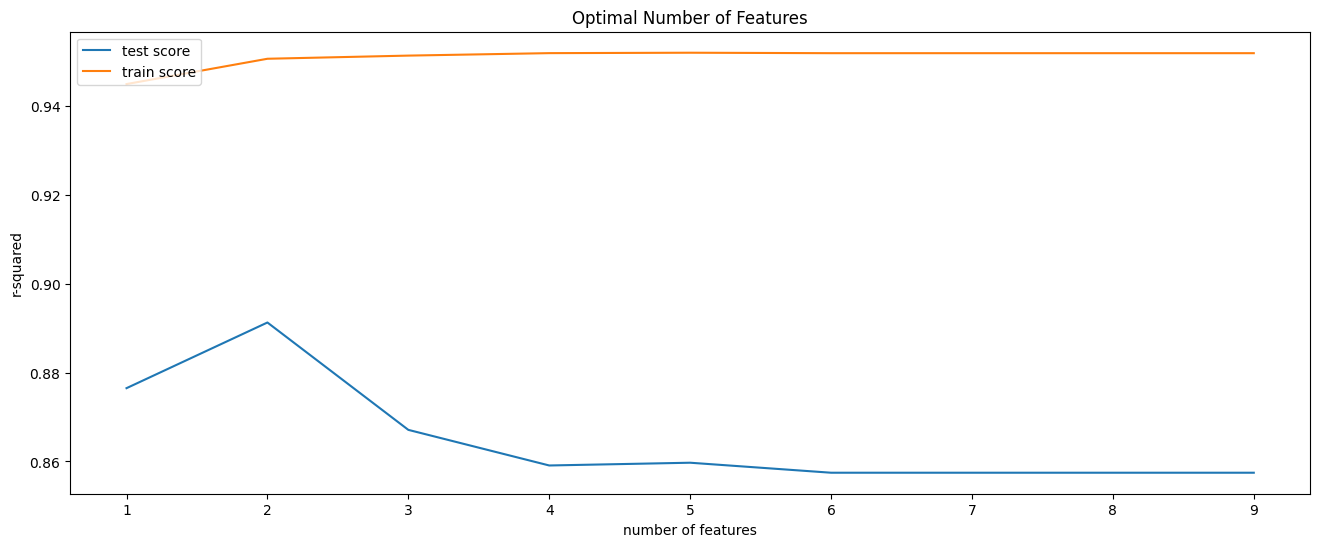

In [140]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [141]:
model_cv.best_params_

{'n_features_to_select': 2}

In [142]:
#final model
n_features_optional = 2

lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [143]:
rfe=RFE(lm,n_features_to_select=n_features_optional)
rfe=rfe.fit(X_train,Y_train)

In [145]:
#predict prices of the test
y_pred = lm.predict(X_test)
r2  = r2_score(Y_test,y_pred)
print(r2)
print('\n')
y_pred1 = rfe.predict(X_test)
r2_1 = r2_score(Y_test,y_pred1)
print(r2_1)

0.9347068473282424


0.9474386447268489


In [146]:
y_pred1

array([[102284.64605183],
       [133873.92383812],
       [134182.1495165 ],
       [ 73701.1069363 ],
       [180642.25299736],
       [114717.24903894],
       [ 68335.07575312],
       [ 97433.45922275],
       [114580.92136452],
       [170343.31979498]])

In [147]:
cv_lm_grid = model_cv.best_estimator_
cv_lm_grid

RFE(estimator=LinearRegression(), n_features_to_select=2)

In [156]:
#saving the model into pickle file
pickle.dump(cv_lm_grid, open('mpg.pkl','wb'))

# Problem - 4

### ### 4.	With the growing consumption of avocados in the USA, a freelance company would like to do some analysis on the patterns of consumption in different cities and would like to come up with a prediction model for the price of avocados. For this to be implemented, build a prediction model using multilinear regression and provide your insights on it. Snapshot of the dataset is given below: -

In [66]:
#import required libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from feature_engine.outliers import Winsorizer

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import joblib,pickle

from sklearn.model_selection import cross_val_score, KFold, GridSearchCV 

from sklearn.feature_selection import RFE

In [67]:
#reading into python
avacado = pd.read_csv(r"D:\360 Data Science 360DigiTMG\Day31-Multiple Linear Regression\Datasets_MLR\Avacado_Price.csv")
avacado

,AveragePrice,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [68]:
#renaming the column
avacado.rename(columns={'XLarge Bags':'XLarge_Bags'},inplace=True)

In [69]:
avacado.columns

Index(['AveragePrice', 'Total_Volume', 'tot_ava1', 'tot_ava2', 'tot_ava3',
       'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge_Bags', 'type', 'year',
       'region'],
      dtype='object')

In [70]:
#information
avacado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total_Volume  18249 non-null  float64
 2   tot_ava1      18249 non-null  float64
 3   tot_ava2      18249 non-null  float64
 4   tot_ava3      18249 non-null  float64
 5   Total_Bags    18249 non-null  float64
 6   Small_Bags    18249 non-null  float64
 7   Large_Bags    18249 non-null  float64
 8   XLarge_Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


In [71]:
#descriptive statistics and data distribution
avacado.describe()

,AveragePrice,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [72]:
#checking for null values
avacado.isnull().any()

AveragePrice    False
Total_Volume    False
tot_ava1        False
tot_ava2        False
tot_ava3        False
Total_Bags      False
Small_Bags      False
Large_Bags      False
XLarge_Bags     False
type            False
year            False
region          False
dtype: bool

In [73]:
#seperating input and output variables
X =pd.DataFrame(avacado.iloc[:, 1:])
y =pd.DataFrame(avacado.iloc[:, 0])

In [74]:
X.head()

,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [75]:
#build a frequeency table using sidetable
import sidetable as stb
X.stb.freq(['type'])

,type,count,percent,cumulative_count,cumulative_percent
0,conventional,9126,50.00822,9126,50.00822
1,organic,9123,49.99178,18249,100.00000


In [76]:
#seggrating numerica and non mumeric variable
num_feat  = X.select_dtypes(exclude=['object']).columns
print(num_feat)
print("\n")
cate_feat = X.select_dtypes(include=['object']).columns
print(cate_feat)

Index(['Total_Volume', 'tot_ava1', 'tot_ava2', 'tot_ava3', 'Total_Bags',
       'Small_Bags', 'Large_Bags', 'XLarge_Bags', 'year'],
      dtype='object')


Index(['type', 'region'], dtype='object')


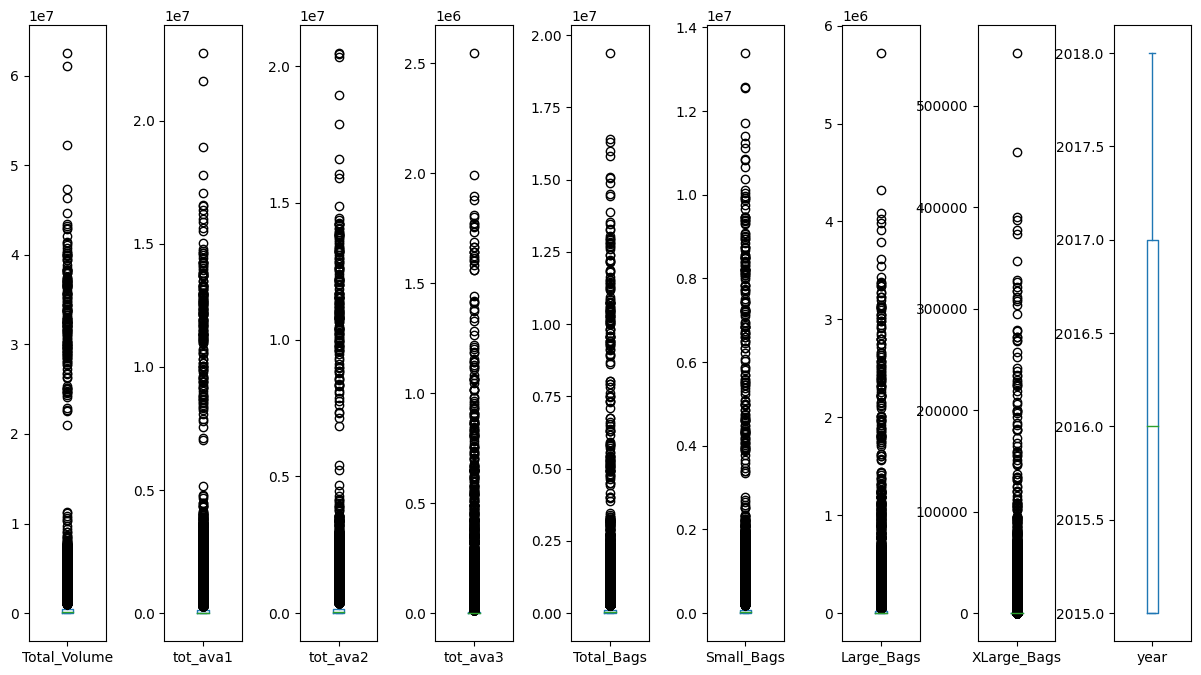

In [77]:
#outlier analysis
X.plot(kind='box',subplots=True,sharey=False,figsize=(15,8))
plt.subplots_adjust(wspace=0.75)
plt.show()

In [78]:
winsor = Winsorizer(capping_method = 'iqr', 
                          tail = 'both',  
                          fold = 1.5,
                          variables =list(num_feat))

clean = winsor.fit(X)
# Save winsorizer model
joblib.dump(clean, 'winsor')

cleandata = clean.transform(X)

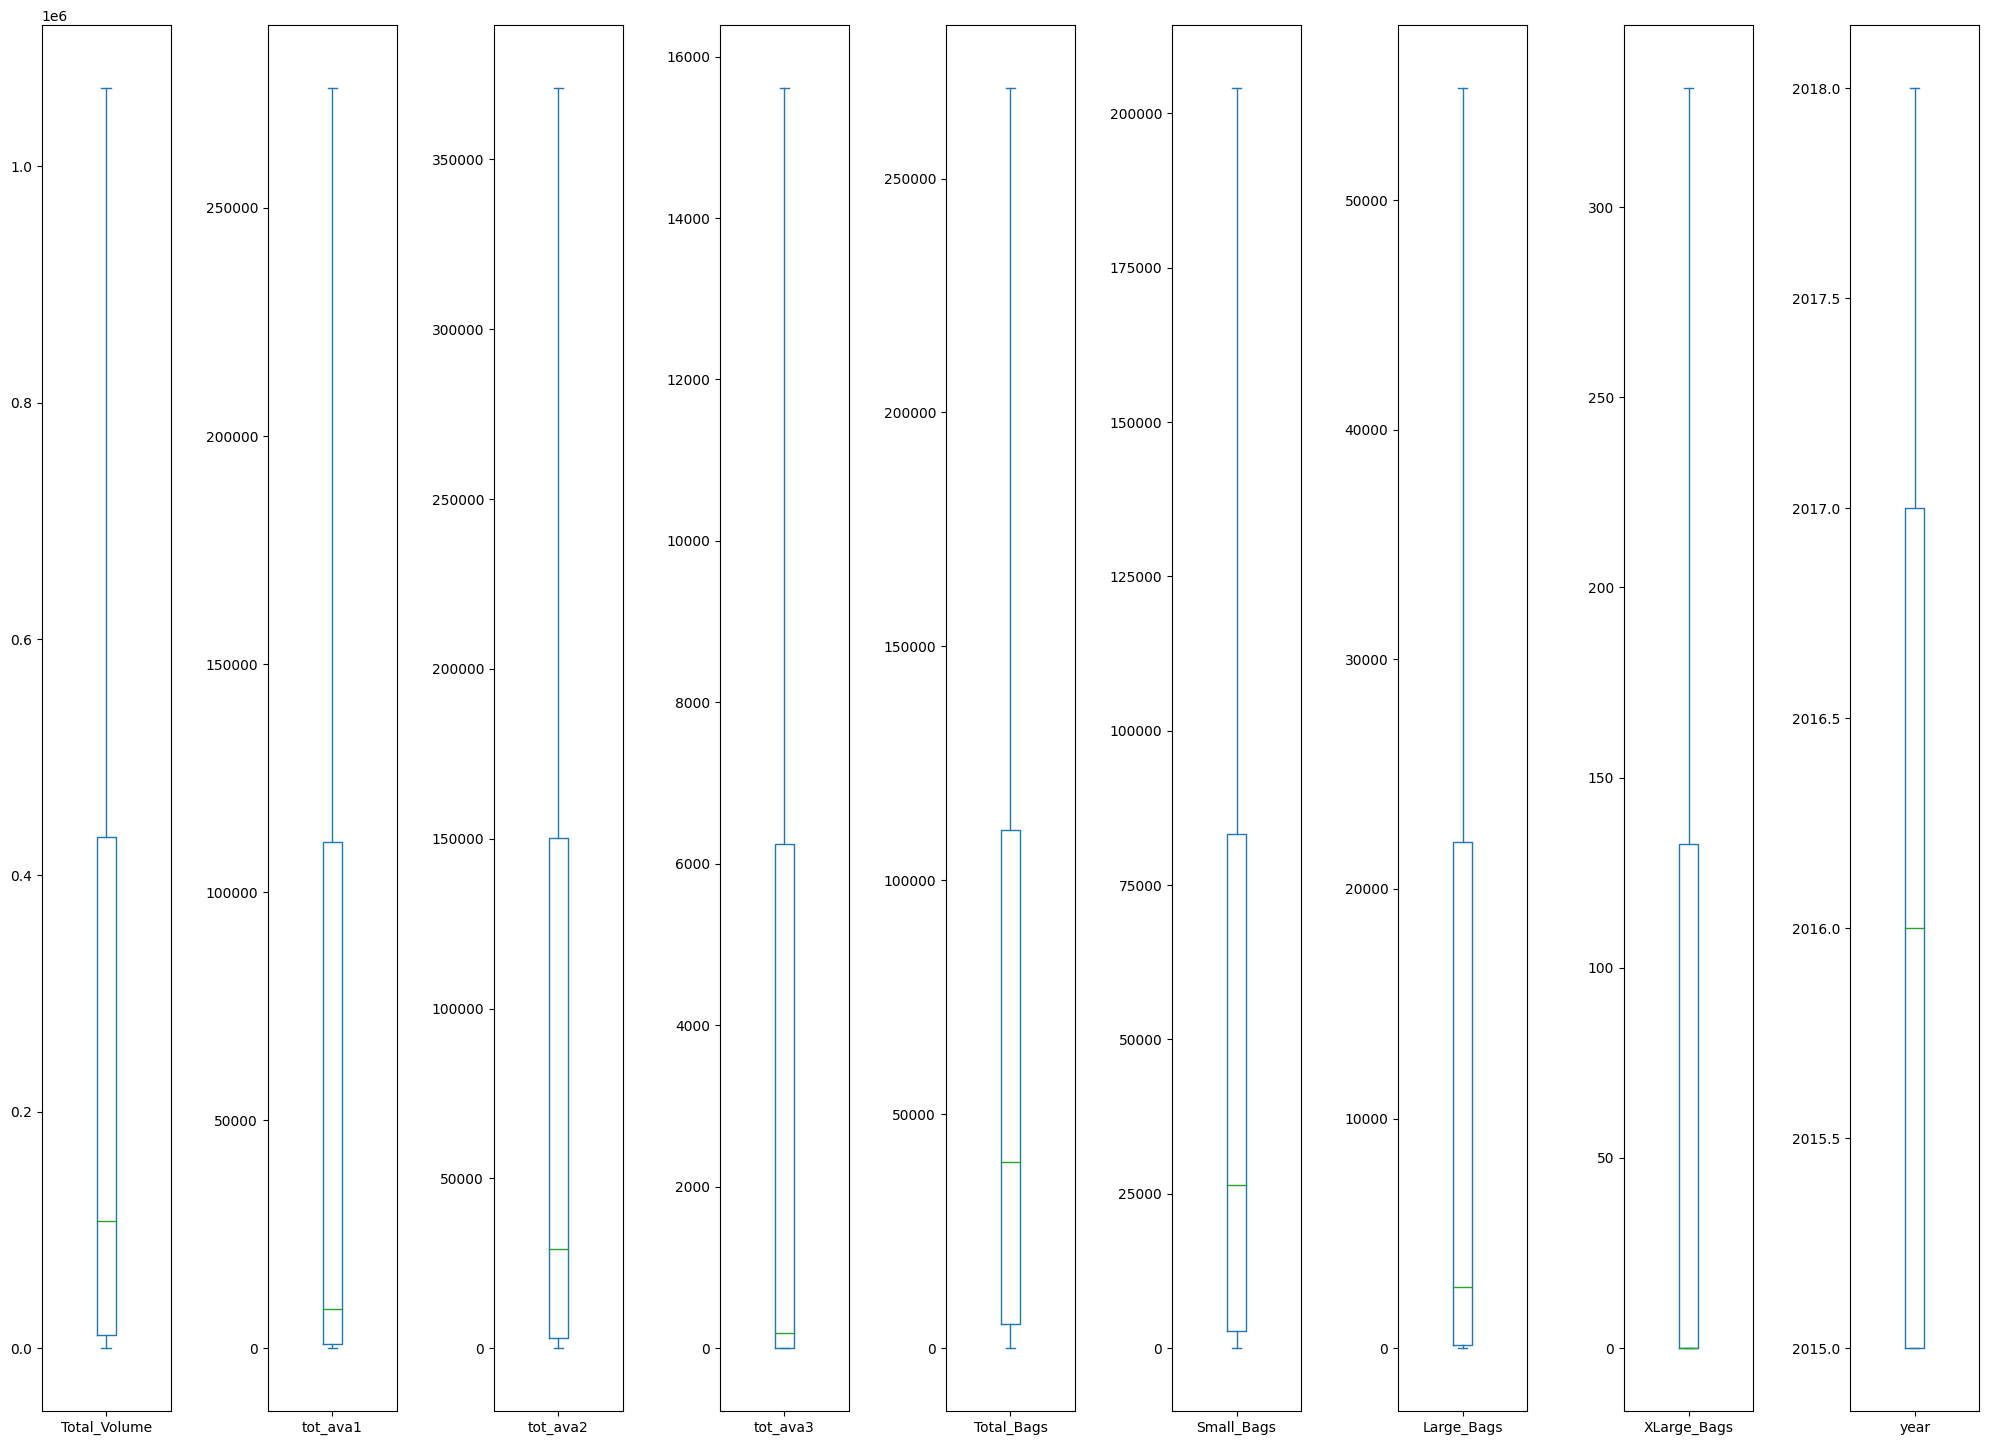

In [79]:
# Boxplot
cleandata.plot(kind = 'box', subplots = True, sharey = False, figsize = (25, 18)) 
plt.subplots_adjust(wspace = 0.75)
plt.show()

In [80]:
#scaling with minmaxscaler
scale_pipeline = Pipeline(steps=[('scale', MinMaxScaler())])

scale_columntransfer = ColumnTransformer(transformers=[('scale', scale_pipeline, num_feat)])
scale = scale_columntransfer.fit(cleandata)

In [81]:
# Save Minmax scaler pipeline model
joblib.dump(scale, 'minmax')

['minmax']

In [82]:
scaled_data = pd.DataFrame(scale.transform(cleandata),columns=num_feat)
scaled_data

,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,year
0,0.060177,0.003753,0.146777,0.003085,0.032291,0.042160,0.001699,0.0,0.0
1,0.051397,0.002441,0.120319,0.003737,0.035294,0.046102,0.001776,0.0,0.0
2,0.110815,0.002877,0.294201,0.008361,0.030244,0.039409,0.001879,0.0,0.0
3,0.074018,0.004097,0.194004,0.004650,0.021577,0.027821,0.002437,0.0,0.0
4,0.047797,0.003408,0.118162,0.004855,0.022961,0.029334,0.003602,0.0,0.0
...,...,...,...,...,...,...,...,...,...
18244,0.015937,0.007409,0.004122,0.000000,0.050120,0.064031,0.007869,0.0,1.0
18245,0.012948,0.004314,0.009249,0.000000,0.034400,0.043809,0.005918,0.0,1.0
18246,0.012834,0.004314,0.006611,0.046637,0.034880,0.045826,0.000771,0.0,1.0
18247,0.015122,0.005529,0.008035,0.046578,0.040730,0.053509,0.000911,0.0,1.0


In [83]:
scaled_data.describe()

,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,year
count,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,0.270998,0.251657,0.266072,0.251236,0.289403,0.281647,0.261002,0.250361,0.382633
std,0.347254,0.359232,0.358850,0.384111,0.345405,0.341566,0.368503,0.416925,0.313313
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010088,0.003091,0.008110,0.000000,0.018894,0.013963,0.002323,0.000000,0.000000
50%,0.100643,0.031293,0.078331,0.011852,0.147568,0.129185,0.048244,0.000000,0.333333
75%,0.406053,0.401855,0.404866,0.400000,0.411336,0.408378,0.401394,0.400000,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
#encoding categorical pipelines
encoding_pipeline = Pipeline(steps=[('encode', OneHotEncoder())])
encode_preprocessor = ColumnTransformer(transformers=[('categorical', encoding_pipeline, cate_feat)])
clean = encode_preprocessor.fit(X)

In [85]:
# Save the encoding model
joblib.dump(clean, 'encoding')

['encoding']

In [86]:
encode_data = pd.DataFrame(clean.transform(X).todense())

encode_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18245,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18246,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18247,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [87]:
clean_data = pd.concat([scaled_data, encode_data], axis = 1)
clean_data

,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,year,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
0,0.060177,0.003753,0.146777,0.003085,0.032291,0.042160,0.001699,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.051397,0.002441,0.120319,0.003737,0.035294,0.046102,0.001776,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.110815,0.002877,0.294201,0.008361,0.030244,0.039409,0.001879,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.074018,0.004097,0.194004,0.004650,0.021577,0.027821,0.002437,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.047797,0.003408,0.118162,0.004855,0.022961,0.029334,0.003602,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.015937,0.007409,0.004122,0.000000,0.050120,0.064031,0.007869,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18245,0.012948,0.004314,0.009249,0.000000,0.034400,0.043809,0.005918,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18246,0.012834,0.004314,0.006611,0.046637,0.034880,0.045826,0.000771,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18247,0.015122,0.005529,0.008035,0.046578,0.040730,0.053509,0.000911,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [88]:
clean_data.describe()

,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,year,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
count,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,0.270998,0.251657,0.266072,0.251236,0.289403,0.281647,0.261002,0.250361,0.382633,0.500082,0.499918,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018522,0.018357
std,0.347254,0.359232,0.358850,0.384111,0.345405,0.341566,0.368503,0.416925,0.313313,0.500014,0.500014,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134831,0.134243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010088,0.003091,0.008110,0.000000,0.018894,0.013963,0.002323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.100643,0.031293,0.078331,0.011852,0.147568,0.129185,0.048244,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [89]:
#correlation analysis on original data
orig_data= avacado.corr()
orig_data

,AveragePrice,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total_Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
tot_ava1,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
tot_ava2,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
tot_ava3,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total_Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small_Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large_Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge_Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


<AxesSubplot: >

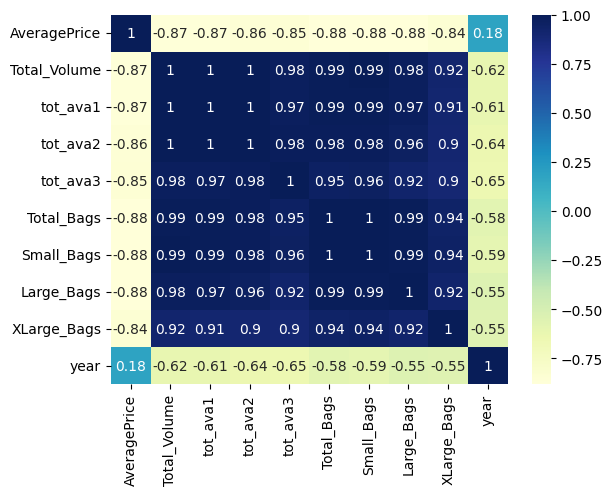

In [90]:
#heatmap
sns.heatmap(orig_data.corr(),annot=True, cmap='YlGnBu')

In [91]:
# multivariate analysis on preprocessed data

In [92]:
#correlation analysis
df_cor = clean_data.corr()
df_cor

,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,year,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
Total_Volume,1.000000,0.862914,0.918696,0.735324,0.926100,0.911307,0.706783,0.584318,0.038736,0.655466,-0.655466,-0.089599,-0.009960,0.040111,-0.091416,-0.000443,-0.082029,0.118449,-0.068204,0.037858,-0.058359,-0.074310,0.090334,0.043700,-0.037608,-0.074070,0.114815,-0.061338,-0.051609,0.087807,-0.074014,-0.075631,-0.047540,0.105276,-0.089567,-0.000619,0.110320,-0.068141,-0.057071,0.098174,0.117177,-0.028704,-0.042836,-0.028368,0.080164,-0.086592,0.099657,0.013924,-0.054318,-0.060875,-0.079746,-0.024718,-0.008657,0.038991,0.012637,-0.040538,0.110471,0.101601,-0.090151,-0.072027,-0.095226,-0.034774,0.254998,0.131661,0.051162
tot_ava1,0.862914,1.000000,0.679998,0.646679,0.791529,0.759106,0.677472,0.536757,0.017481,0.627013,-0.627013,-0.093713,0.080613,-0.046882,-0.068526,-0.089324,-0.093778,0.117980,-0.065261,-0.052248,-0.088747,-0.044694,0.099941,0.011996,-0.019315,-0.094217,0.098416,-0.065459,-0.090833,0.101348,-0.086304,-0.032876,-0.015245,0.104726,-0.093332,0.085085,0.098095,-0.021749,0.012037,-0.065027,0.031654,-0.085167,0.036103,-0.077337,0.098520,-0.079969,0.097767,-0.001194,-0.047828,-0.045141,-0.065715,-0.000427,0.038873,0.038582,-0.008325,0.019469,0.118495,0.101170,-0.079430,-0.040907,-0.094879,0.042208,0.196842,0.127723,0.096627
tot_ava2,0.918696,0.679998,1.000000,0.716079,0.809947,0.827511,0.561624,0.553875,-0.007602,0.627230,-0.627230,-0.063039,-0.069645,0.092000,-0.098286,0.083754,-0.069186,0.122902,-0.064064,0.097340,-0.038854,-0.084409,0.039166,0.042598,-0.065950,-0.049223,0.122227,-0.038696,0.013332,0.035701,-0.057703,-0.091092,-0.054953,0.100465,-0.076176,-0.056337,0.110841,-0.090225,-0.088386,0.101509,0.108031,0.051805,-0.076338,0.027114,0.016667,-0.079568,0.096415,0.004178,-0.050943,-0.052780,-0.077523,0.022584,-0.012746,0.092653,0.007534,-0.063295,0.092653,0.083557,-0.086818,-0.090259,-0.082350,-0.069129,0.242766,0.123445,-0.033409
tot_ava3,0.735324,0.646679,0.716079,1.000000,0.663865,0.677017,0.435210,0.559618,-0.083827,0.610211,-0.610211,-0.086123,-0.082719,0.050463,-0.017986,-0.027931,-0.086546,0.089057,0.055807,0.088970,-0.018998,-0.002627,0.006487,0.060778,0.073520,0.033579,0.089087,-0.084814,-0.078815,-0.003691,-0.004207,-0.084876,-0.010550,0.089017,-0.066839,-0.082708,0.118126,-0.046273,-0.075737,-0.029268,0.051926,-0.031258,-0.086562,-0.057524,0.041742,-0.070400,0.045092,0.080594,0.051471,-0.011866,-0.088055,0.005584,0.083281,0.032755,-0.021307,0.007285,0.085522,0.049190,-0.070857,-0.088058,-0.087948,-0.087211,0.149289,0.092124,0.061274
Total_Bags,0.926100,0.791529,0.809947,0.663865,1.000000,0.961362,0.775343,0.599925,0.146330,0.623950,-0.623950,-0.103393,0.006369,0.037300,-0.091512,-0.021188,-0.064375,0.122385,-0.063994,-0.042471,-0.024363,-0.071341,0.049992,0.070666,-0.010451,-0.075042,0.129688,-0.055993,-0.065588,0.043115,-0.062758,-0.072644,-0.036228,0.114482,-0.086113,-0.012814,0.126620,-0.058448,-0.052761,0.095934,0.153871,-0.054351,-0.041433,-0.010888,0.030742,-0.083447,0.100257,0.049817,-0.046836,-0.060454,-0.073199,-0.075859,-0.014015,-0.050043,0.055786,-0.035802,0.133309,0.110995,-0.087777,-0.050720,-0.096786,-0.029920,0.261674,0.162614,0.027511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,-0.095226,-0.094879,-0.082350,-0.087948,-0.096786,-0.092019,-0.087151,-0.050176,0.000004,-0.000023,0.000023,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.018871,-0.0188

In [93]:
# By default, statsmodels fits a line passing through the origin, i.e. it doesn't fit an intercept.
# Hence, you need to use the command 'add_constant' so that it also fits an intercept
P = add_constant(clean_data)
basemodel = sm.OLS(y, P).fit()
basemodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     395.3
Date:                Sat, 07 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:15:19   Log-Likelihood:                -1423.3
No. Observations:               18249   AIC:                             2975.
Df Residuals:                   18185   BIC:                             3474.
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.906e+10   1.93e+11     -0.099      0.921   -3.97e+11    3.59e+11
Total_Volume    -0.3213      0.042     -7.667      0.000      -0.404      -0.239
tot_ava1         0.0617      0.017      3.535      0.000       0.027       0.096
tot_ava2         0.0791      0.023      3.429      0.001       0.034       0.124
tot_ava3        -0.0654      0.009     -6.892      0.000      -0.084      -0.047
Total_Bags      -0.1079      0.038     -2.807      0.005      -0.183      -0.033
Small_Bags       0.0512      0.032      1.579      0.114      -0.012       0.115
Large_Bags      -0.0698      0.013     -5.295      0.000      -0.096      -0.044
XLarge_Bags      0.0905      0.007     13.387      0.000       0.077       0.104
year             0.1288      0.007     18.612      0.000       0.115       0.142
0             1.942e+10   1.97e+11      0.099      0.921   -3.66e+11    4.05e+11
1             1.942e+10   1.97e+11      0.099      0.921   -3.66e+11    4.05e+11
2            -3.559e+08    3.6e+09     -0.099      0.921   -7.42e+09    6.71e+09
3            -3.559e+08    3.6e+09     -0.099      0.921   -7.42e+09    6.71e+09
4            -3.559e+08    3.6e+09     -0.099      0.921   -7.42e+09    6.71e+09
5            -3.559e+08    3.6e+09     -0.099      0.921   -7.42e+09    6.71e+09
6            -3.559e+08    3.6e+09     -0.099      0.921   -7.42e+09    6.71e+09
7            -3.559e+08    3.6e+09     -0.099      0.921   -7.42e+09    6.71e+09
8            -3.559e+08    3.6e+09     -0.099      0.921   -7.42e+09    6.71e+09
9            -3.559e+08    3.6e+09     -0.099      0.921   -7.42e+09    6.71e+09
10           -3.559e+08    3.6e+09     -0.099      0.921   -7.42e+09    6.71e+09
11           -3.559e+08    3.6e+09     -0.099      0.921   -7.42e+09    6.71e+09
12           -3.559e+08    3.6e+09     -0.099      0.921   -7.42e+09    6.71e+09
13           -3.559e+08    3.6e+09     -0.099      0.921   -7.42e+09    6.71e+09
14           -3.559e+08    3.6e+09     -0.099      0.921   -7.42e+09    6.71e+09
15           -3.559e+08    3.6e+09     -0.099      0.921   -7.42e+09    6.71e+09
16           -3.559e+08    3.6e+09     -0.099      0.921   -7.42e+09    6.71e+09
17           -3.559e+08    3.6e+09     -0.099      0.921   -7.42e+09    6.71e+09
18           -3.559e+08    3.6e+09     -0.099      0.921   -7.42e+09    6.71e+09
19           -3.559e+08    3.6e+09     -0.099      0.921   -7.42e+09    6.71e+09
20           -3.559e+08    3.6e+09     -0.099      0.921   -7.42e+09    6.71e+09
21           -3.559e+08    3.6e+09     -0.099      0.921   -7.42e+09    6.71e+09
22           -3.559e+08    3.6e+09     -0.099      0.921   -7.42e+09    6.71e+09
23           -3.559e+08    3.6e+09     -0.099      0.921   -7.42e+09    6.71e+09
24           -3.559e+08    3.6e+09     -0.099      0.921   -7.42e+09    6.71e+09
25   

In [94]:
# Identify the variale with highest colinearity using Variance Inflation factor (VIF)
vif = pd.Series([variance_inflation_factor(P.values, i) for i in range(P.shape[1])], index=P.columns)
print(vif)

C:\Users\J. Berger Perkins\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\J. Berger Perkins\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


const           0.000000e+00
Total_Volume    5.628261e+01
tot_ava1        1.043729e+01
tot_ava2        1.822130e+01
tot_ava3        3.532538e+00
                    ...     
51              9.995059e+08
52              4.442395e+09
53              1.599261e+11
54              8.950968e+08
55              4.648613e+10
Length: 66, dtype: float64


In [95]:
# Splitting data into training and testing data set
X_train, X_test, Y_train, Y_test = train_test_split(clean_data, y,
                                                    test_size = 0.2, 
                                                    random_state = 0) 

In [96]:
## Build the best model Model building with out cv
model = sm.OLS(Y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     318.6
Date:                Sat, 07 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:15:32   Log-Likelihood:                -1093.6
No. Observations:               14599   AIC:                             2315.
Df Residuals:                   14535   BIC:                             2801.
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Total_Volume    -0.3216      0.047     -6.888      0.000      -0.413      -0.230
tot_ava1         0.0608      0.020      3.100      0.002       0.022       0.099
tot_ava2         0.0732      0.026      2.844      0.004       0.023       0.124
tot_ava3        -0.0600      0.011     -5.679      0.000      -0.081      -0.039
Total_Bags      -0.1193      0.043     -2.784      0.005      -0.203      -0.035
Small_Bags       0.0718      0.036      1.980      0.048       0.001       0.143
Large_Bags      -0.0689      0.015     -4.697      0.000      -0.098      -0.040
XLarge_Bags      0.0863      0.008     11.487      0.000       0.072       0.101
year             0.1202      0.008     15.642      0.000       0.105       0.135
0                1.1958      0.009    137.691      0.000       1.179       1.213
1                1.5751      0.004    387.811      0.000       1.567       1.583
2                0.1316      0.016      8.113      0.000       0.100       0.163
3               -0.0199      0.017     -1.202      0.230      -0.052       0.013
4                0.2050      0.017     12.411      0.000       0.173       0.237
5               -0.0691      0.016     -4.275      0.000      -0.101      -0.037
6                0.1694      0.016     10.344      0.000       0.137       0.201
7                0.1078      0.016      6.832      0.000       0.077       0.139
8                0.1220      0.017      7.163      0.000       0.089       0.155
9                0.2089      0.016     12.846      0.000       0.177       0.241
10               0.2060      0.017     12.151      0.000       0.173       0.239
11              -0.1685      0.016    -10.233      0.000      -0.201      -0.136
12              -0.1716      0.016    -10.654      0.000      -0.203      -0.140
13              -0.2207      0.016    -13.583      0.000      -0.253      -0.189
14              -0.0347      0.017     -1.995      0.046      -0.069      -0.001
15              -0.1045      0.016     -6.483      0.000      -0.136      -0.073
16               0.0863      0.016      5.318      0.000       0.054       0.118
17               0.0805      0.017      4.682      0.000       0.047       0.114
18               0.1013      0.016      6.494      0.000       0.071       0.132
19               0.3965      0.016     24.670      0.000       0.365       0.428
20              -0.2385      0.016    -14.663      0.000      -0.270      -0.207
21              -0.0877      0.016     -5.394      0.000      -0.120      -0.056
22               0.0931      0.016      5.696      0.000       0.061       0.125
23               0.0031      0.016      0.192      0.848      -0.029       0.035
24              -0.0760      0.016     -4.655      0.000      -0.108      -0.044
25              -0.1420      0.017     -8.546      0.000      -0.175      -0.109
26   

In [97]:
# Predicting upon X_test - validate the model for right fit
y_pred = model.predict(X_test)
# checking the Accurarcy by using r2_score
r_squared = r2_score(Y_test, y_pred)
r_squared

0.5672500733450399

In [98]:
test_resid  = Y_test.AveragePrice - y_pred
# RMSE value for tr ain data 
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
test_rmse

0.2654979252693226

In [99]:
# Predicting upon X_train
ytrain_pred = model.predict(X_train)
r_squared_train = r2_score(Y_train, ytrain_pred)
r_squared_train

0.5799623311687683

In [100]:
# Train residual values
train_resid  = Y_train.AveragePrice - ytrain_pred
# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid * train_resid))
train_rmse

0.2607929925974875

#Training Error and Test Error is approximately equal then we can say it is right fit.
#So this model can be accepted

# problem - 3

### 3.	An online car sales platform would like to improve its customer base and their experience by providing them an easy way to buy and sell cars. For this, they would like an automated model which can predict the price of the car once the user inputs the required factors. Help the business achieve their objective by applying multilinear regression on the given dataset. Please use the below columns for the analysis purpose: price, age_08_04, KM, HP, cc, Doors, Gears, Quarterly_Tax, and Weight.


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import sidetable as stb

from feature_engine.outliers import Winsorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MaxAbsScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold

from sklearn.linear_model import LinearRegression

from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

import joblib,pickle

In [37]:
import os
os.chdir(r"D:\360 Data Science 360DigiTMG\Day31-Multiple Linear Regression\Datasets_MLR")

In [40]:
cars = pd.read_csv("ToyotaCorolla.csv",usecols=['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],delimiter=',',encoding= 'ISO-8859-1')
cars.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [41]:
cars.info() #information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [42]:
cars.isnull().sum()   #checking for null values

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [48]:
dup=cars.duplicated()
print(dup)                  #duplicates 
sum(dup)

0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Length: 1436, dtype: bool


1

In [51]:
cars = cars.drop_duplicates()    #dropping the duplicates

In [52]:
dup=cars.duplicated()
print(dup)
sum(dup)                        #verifying the duplicates after drop

0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Length: 1435, dtype: bool


0

In [103]:
# Seperating input and output variables 
X = pd.DataFrame(cars.iloc[:, 1:])
y = pd.DataFrame(cars.iloc[:, 0])

In [104]:
X.head()                        

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170


In [105]:
y.head()

,Price
0,13500
1,13750
2,13950
3,14950
4,13750


In [149]:
# Segregating Numeric features
numeric_features = X.select_dtypes(exclude = ['object']).columns
print(numeric_features)

Index(['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax',
       'Weight'],
      dtype='object')


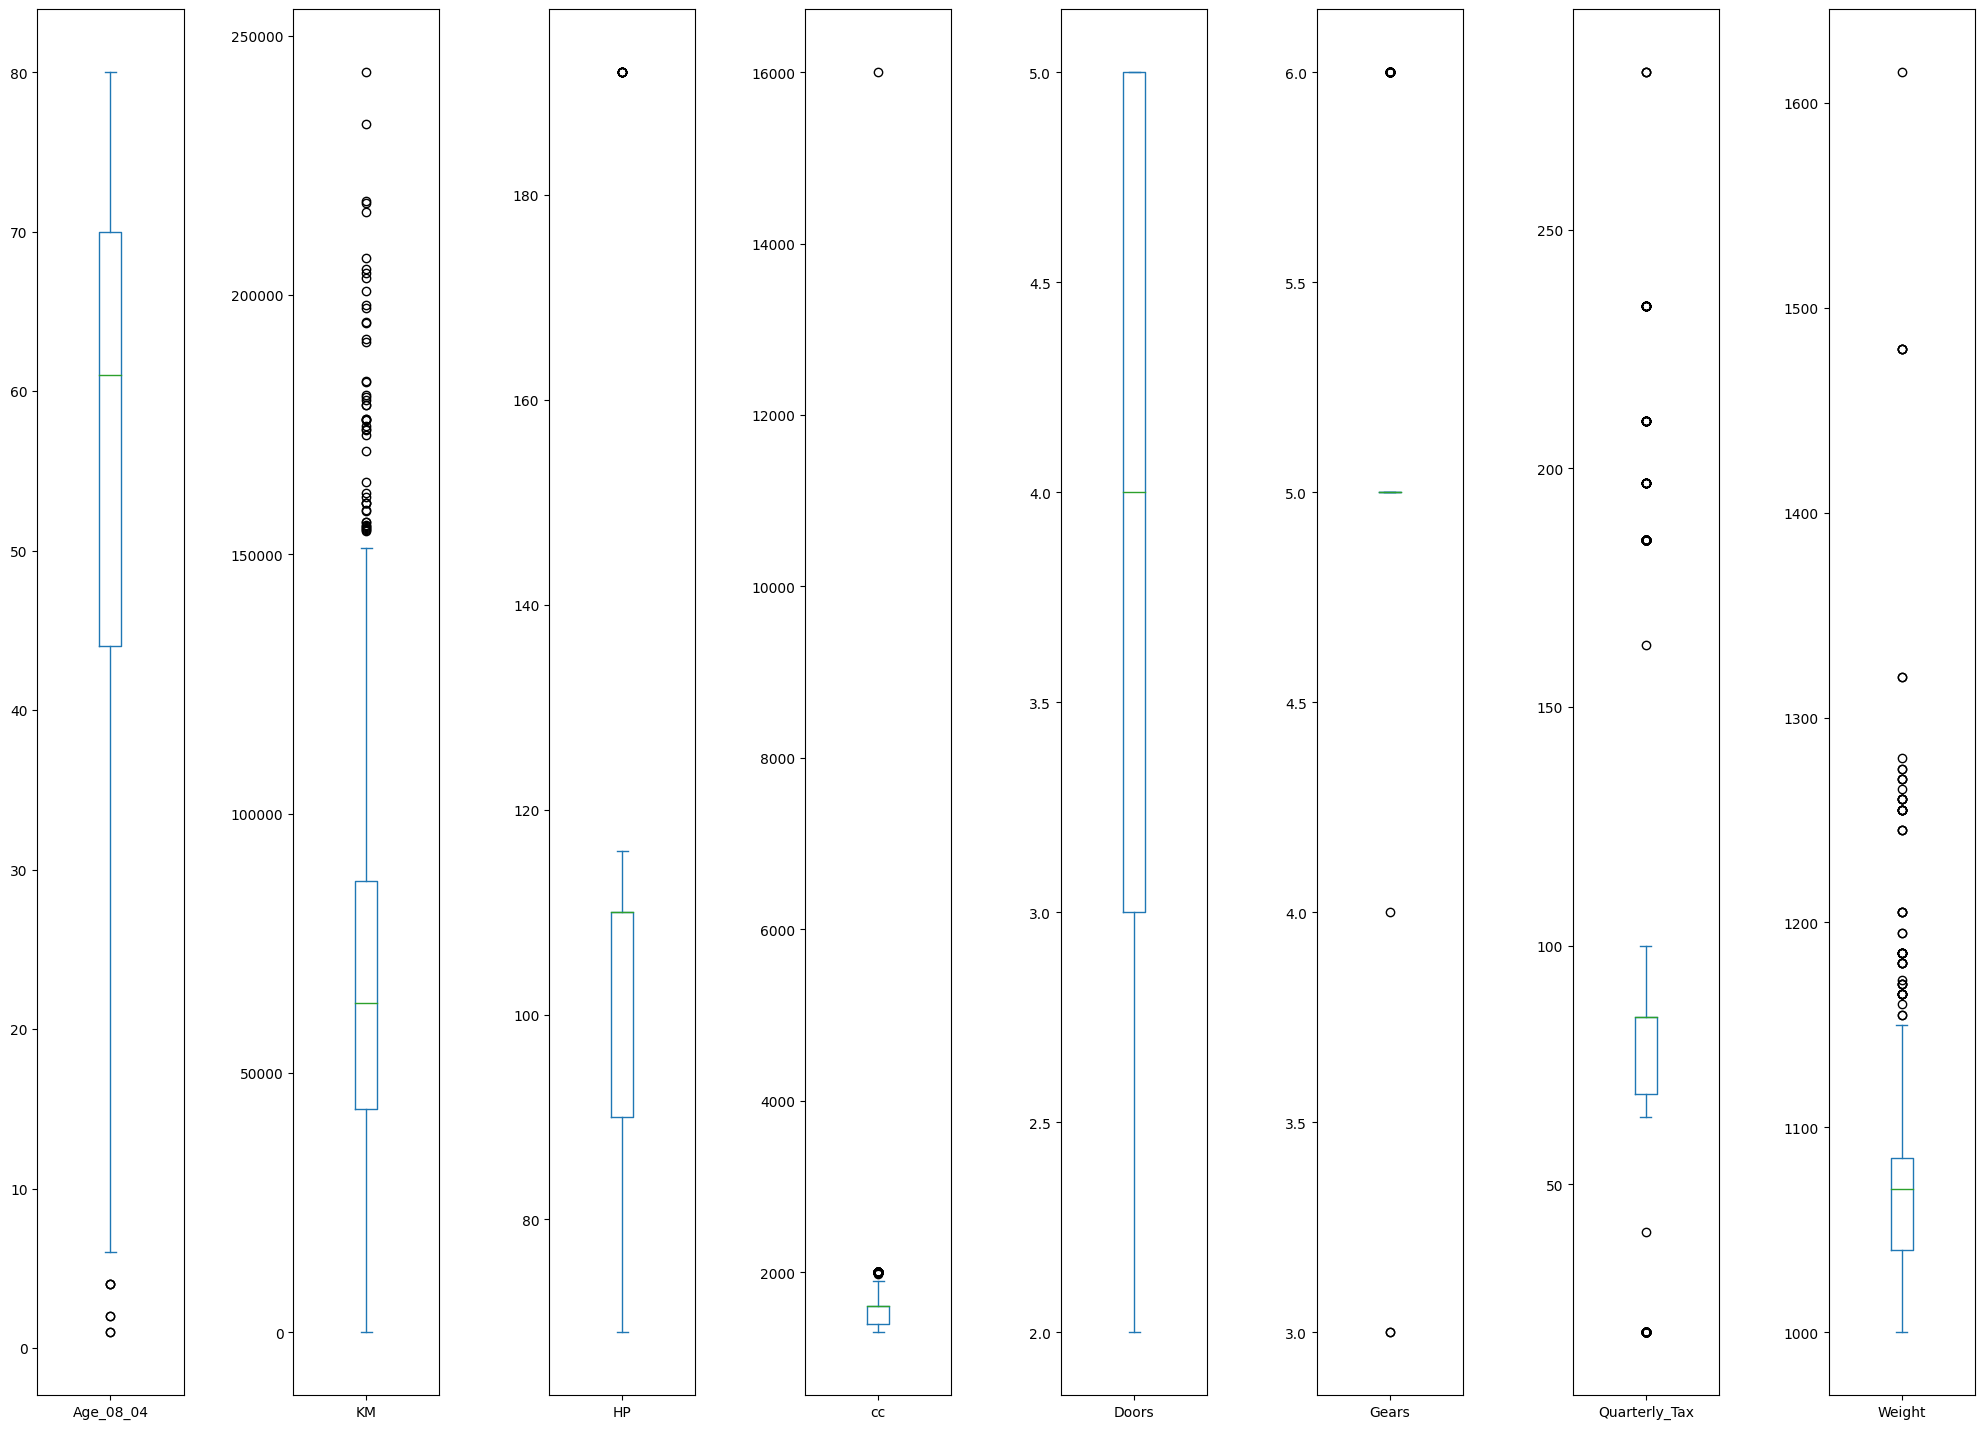

In [150]:
#checking for outliers
X.plot(kind = 'box', subplots = True, sharey = False, figsize = (25, 18)) 
plt.subplots_adjust(wspace = 0.75)
plt.show()

In [151]:
# Winsorization for outlier treatment
winsor = Winsorizer(capping_method = 'iqr',
                          tail = 'both',
                          fold = 1.5,
                          variables = list(X[['Age_08_04', 'KM', 'HP', 'cc', 'Doors','Quarterly_Tax', 'Weight']]))
winsor

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Quarterly_Tax',
                      'Weight'])

In [152]:
clean = winsor.fit(X)

# Save winsorizer model
joblib.dump(clean, 'winsor')

['winsor']

In [153]:
# Transformed data
cleandata = pd.DataFrame(clean.transform(X),columns=numeric_features)
cleandata

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23.0,46986.0,90.0,1900.0,3,5,109.0,1152.5
1,23.0,72937.0,90.0,1900.0,3,5,109.0,1152.5
2,24.0,41711.0,90.0,1900.0,3,5,109.0,1152.5
3,26.0,48000.0,90.0,1900.0,3,5,109.0,1152.5
4,30.0,38500.0,90.0,1900.0,3,5,109.0,1152.5
...,...,...,...,...,...,...,...,...
1431,69.0,20544.0,86.0,1300.0,3,5,69.0,1025.0
1432,72.0,19000.0,86.0,1300.0,3,5,69.0,1015.0
1433,71.0,17016.0,86.0,1300.0,3,5,69.0,1015.0
1434,70.0,16916.0,86.0,1300.0,3,5,69.0,1015.0


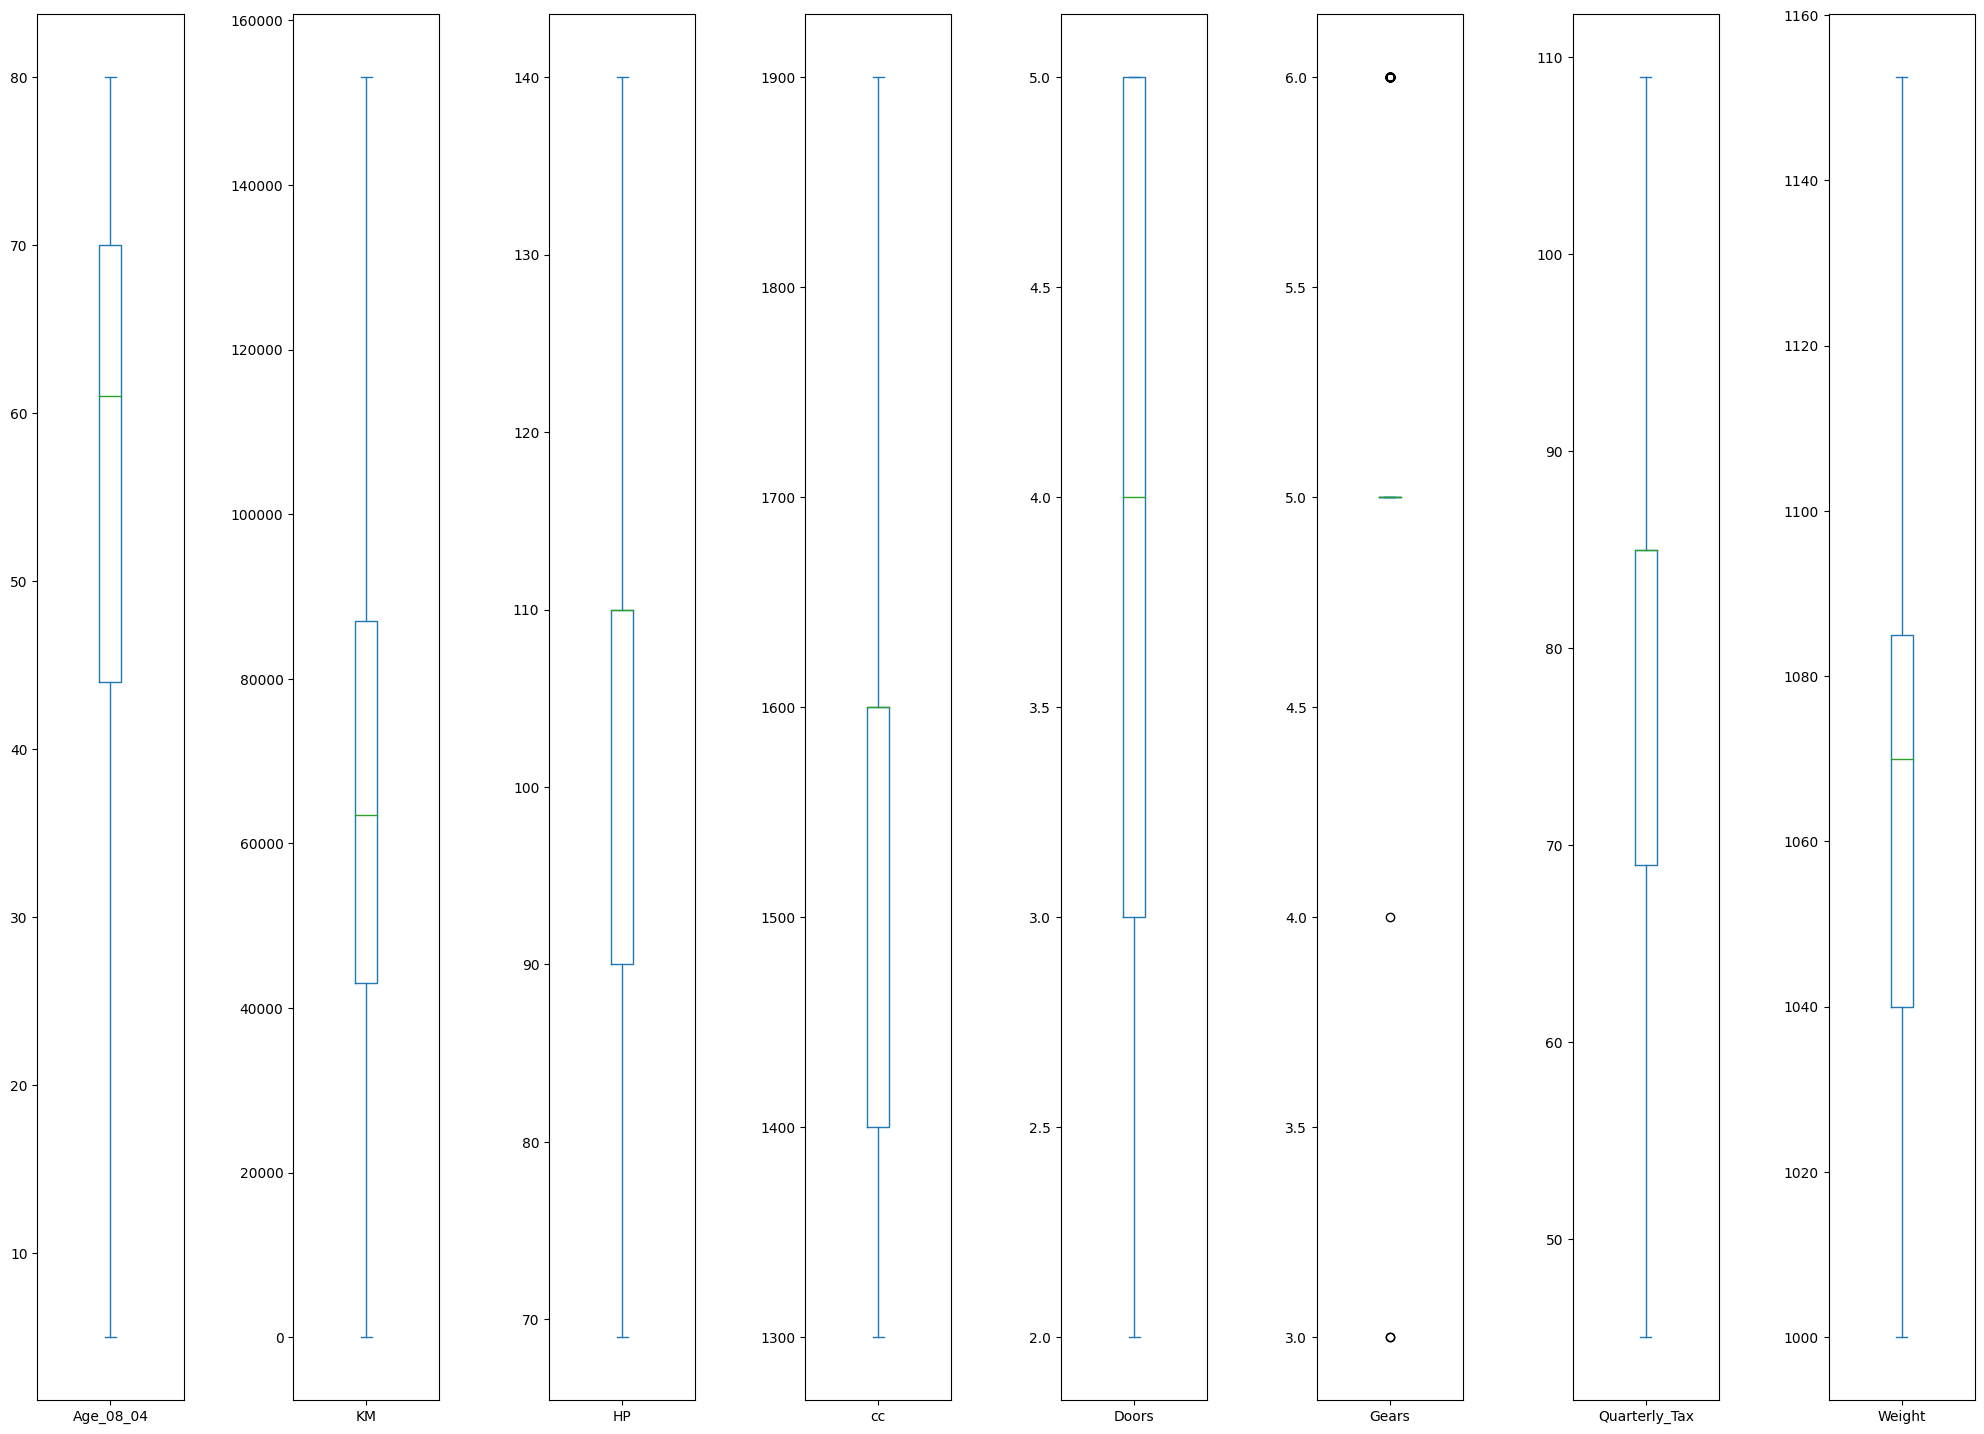

In [154]:
# Boxplot
cleandata.plot(kind = 'box', subplots = True, sharey = False, figsize = (25, 18)) 
plt.subplots_adjust(wspace = 0.75)
plt.show()

In [155]:
#scaling using min max scaler
scale_pipeline = Pipeline([('scale', MinMaxScaler())])
scale_columntransfer = ColumnTransformer(transformers=[('scale', scale_pipeline,numeric_features)]) 

In [156]:
scale = scale_columntransfer.fit(cleandata)

# Save Minmax scaler pipeline model
joblib.dump(scale, 'minmax')

['minmax']

In [157]:
scaled_data = pd.DataFrame(scale.transform(cleandata))
scaled_data.describe()

,0,1,2,3,4,5,6,7
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,0.679898,0.441818,0.452019,0.430546,0.677584,0.675494,0.533580,0.449317
std,0.247063,0.226811,0.185157,0.281314,0.317556,0.062858,0.229698,0.247362
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.520000,0.280851,0.295775,0.166667,0.333333,0.666667,0.375000,0.262295
50%,0.746667,0.414428,0.577465,0.500000,0.666667,0.666667,0.625000,0.459016
75%,0.866667,0.568510,0.577465,0.500000,1.000000,0.666667,0.625000,0.557377
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [158]:
#correlation
cars.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


<AxesSubplot: >

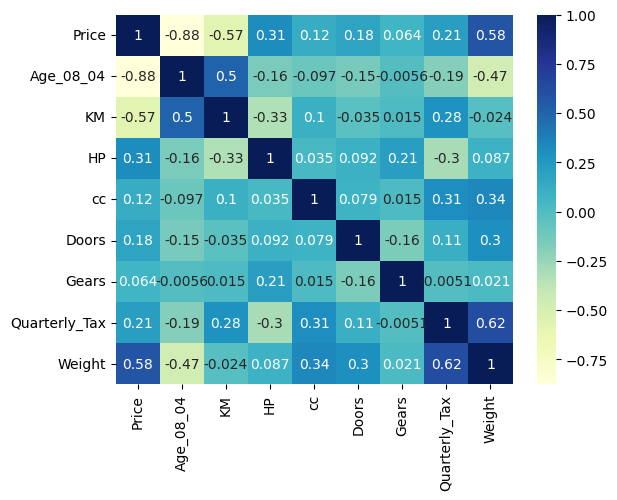

In [159]:
sns.heatmap(cars.corr(),annot=True,cmap='YlGnBu')

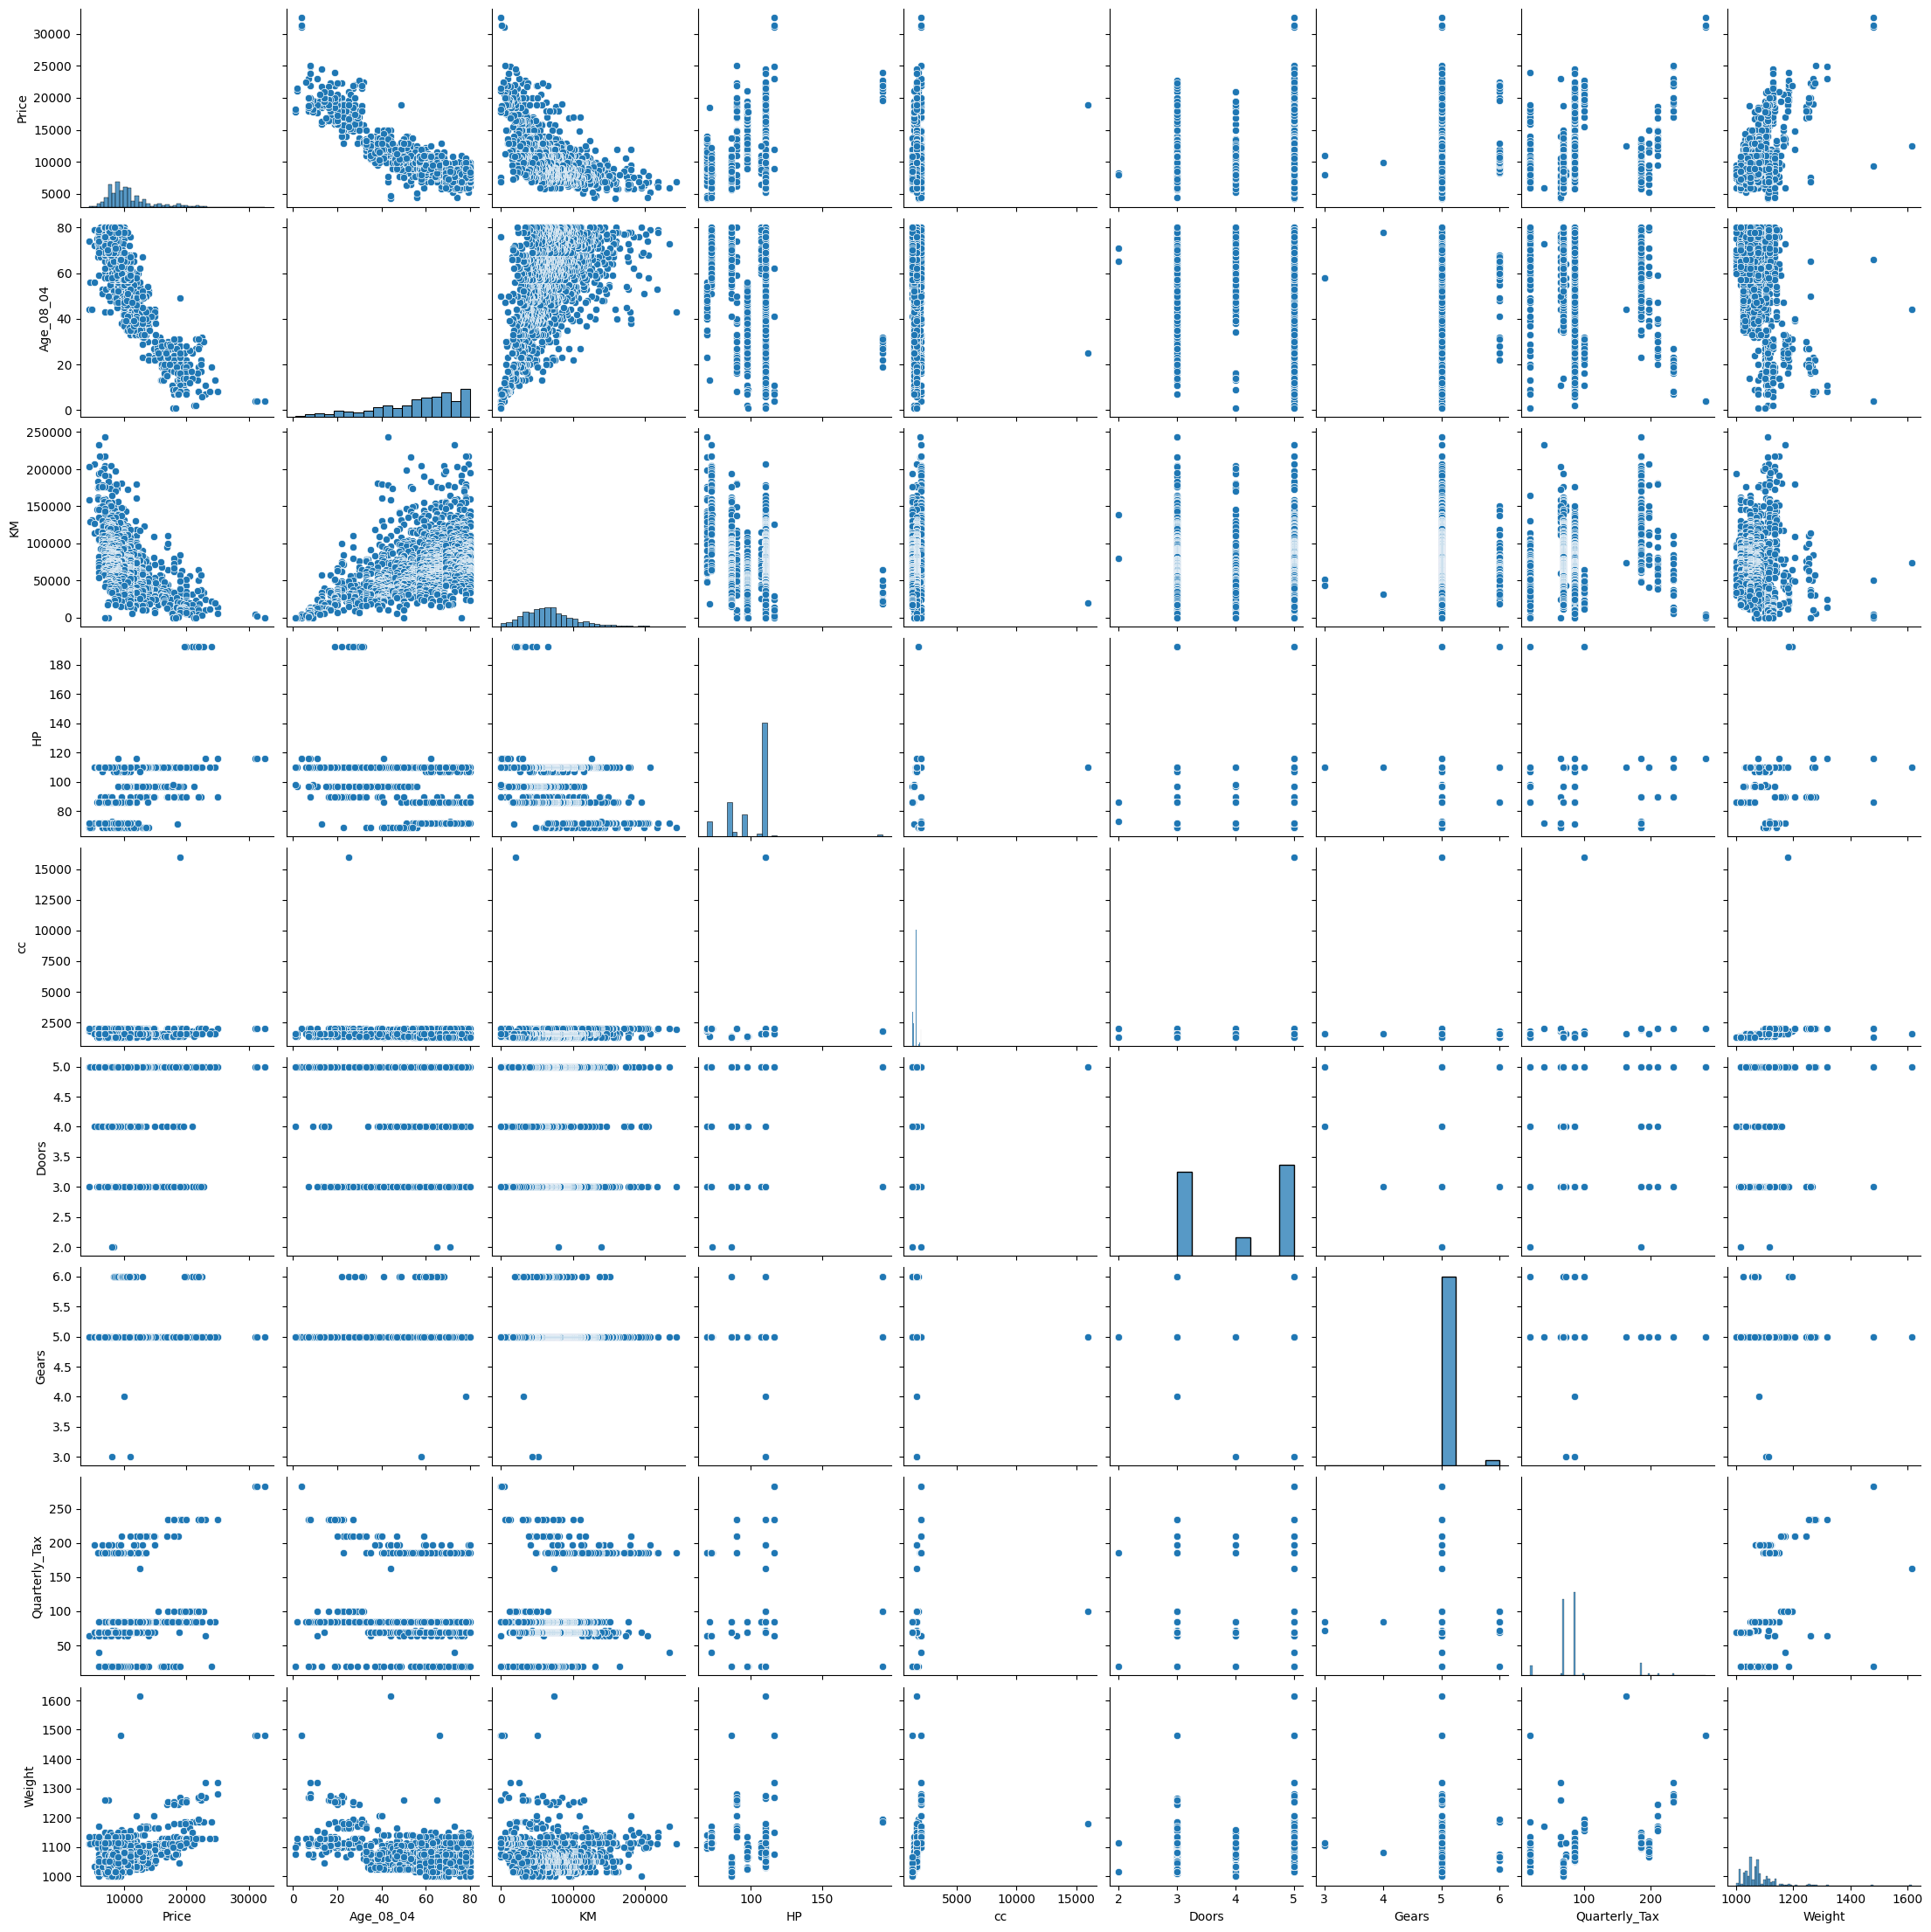

In [161]:
sns.pairplot(cars)

In [163]:
#vif for cleaned data
P = add_constant(cleandata)
model = sm.OLS(y, P).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     966.3
Date:                Sat, 07 Jan 2023   Prob (F-statistic):               0.00
Time:                        12:10:46   Log-Likelihood:                -12456.
No. Observations:                1435   AIC:                         2.493e+04
Df Residuals:                    1426   BIC:                         2.498e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -1.59e+04   2023.414     -7.860      0.000   -1.99e+04   -1.19e+04
Age_08_04      -121.0016      2.964    -40.827      0.000    -126.815    -115.188
KM               -0.0198      0.002    -13.095      0.000      -0.023      -0.017
HP               37.0256      3.363     11.010      0.000      30.429      43.622
cc               -2.7616      0.387     -7.142      0.000      -3.520      -2.003
Doors          -143.1555     46.147     -3.102      0.002    -233.678     -52.633
Gears           686.4442    208.441      3.293      0.001     277.561    1095.328
Quarterly_Tax    13.4418      3.608      3.726      0.000       6.365      20.519
Weight           29.3501      2.004     14.648      0.000      25.420      33.281
==============================================================================
Omnibus:                      460.381   Durbin-Watson:                   1.474
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4628.962
Skew:                           1.194   Prob(JB):                         0.00
Kurtosis:                      11.468   Cond. No.                     4.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [164]:
vif=pd.Series([variance_inflation_factor(P.values,i) for i in range(P.shape[1])], index=P.columns)
vif

const            2880.727173
Age_08_04           2.120572
KM                  1.935350
HP                  1.374109
cc                  2.994733
Doors               1.358912
Gears               1.086332
Quarterly_Tax       1.977594
Weight              4.016847
dtype: float64

In [165]:
#splitting the data into train and test
X_train,X_test,Y_train,Y_test = train_test_split(cleandata,y,test_size=0.2,random_state=0)

In [168]:
## Build the best model Model building with out cv
# import library to perform multilinear regression

multilinear = LinearRegression()

model=multilinear.fit(X_train, Y_train)

In [169]:
# Predicting upon X_test
y_pred = model.predict(X_test)
# checking the Accurarcy by using r2_score
accuracy = r2_score(Y_test, y_pred)
accuracy

0.8580498155968792

In [170]:
# k-fold CV (using all variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, Y_train, scoring='r2', cv=5)
scores      

array([0.796862  , 0.82221543, 0.83427241, 0.84845381, 0.86459292])

In [171]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, Y_train, scoring='r2', cv=folds)
scores 

array([0.82882629, 0.84319685, 0.82493917, 0.85308997, 0.81779084])

In [172]:
# can tune other metrics, such as MSE
scores = cross_val_score(lm, X_train, Y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-1960209.45930556, -2259858.85514392, -2672941.91967602,
       -2057478.61805482, -1822960.85002981])

In [173]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 10))}]

In [174]:
# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [176]:
#Recursive feature elimination
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, Y_train)     

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
             return_train_score=True, scoring='r2', verbose=1)

In [177]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009079,0.000426,0.002802,0.000751,1,{'n_features_to_select': 1},-0.001238,-0.008711,0.004611,-0.018666,-0.008034,-0.006408,0.007827,9,0.004796,0.003517,0.003281,0.004464,0.003776,0.003967,0.000573
1,0.007872,0.001443,0.002798,0.000399,2,{'n_features_to_select': 2},0.043812,0.030743,0.019807,0.022219,0.035948,0.030506,0.008830,8,0.040963,0.041194,0.046997,0.042544,0.041147,0.042569,0.002285
2,0.007059,0.007155,0.002711,0.005423,3,{'n_features_to_select': 3},0.757035,0.795528,0.757914,0.781422,0.727140,0.763808,0.023416,7,0.774848,0.761640,0.774102,0.768262,0.778357,0.771442,0.005877
3,0.007107,0.005408,0.002706,0.001600,4,{'n_features_to_select': 4},0.774489,0.808151,0.788956,0.784921,0.751178,0.781539,0.018688,6,0.792436,0.780863,0.788212,0.788361,0.794715,0.788917,0.004726
4,0.004128,0.006075,0.000333,0.000667,5,{'n_features_to_select': 5},0.792473,0.828479,0.784619,0.811670,0.783043,0.800057,0.017481,4,0.811025,0.798754,0.811273,0.805198,0.810905,0.807431,0.004899
5,0.003126,0.006251,0.003125,0.006250,6,{'n_features_to_select': 6},0.793015,0.828286,0.785306,0.806179,0.779564,0.798470,0.017372,5,0.811094,0.798757,0.811319,0.806194,0.811616,0.807796,0.004943
6,0.006252,0.007657,0.003131,0.006261,7,{'n_features_to_select': 7},0.811765,0.828637,0.803454,0.814991,0.799981,0.811766,0.010030,3,0.822199,0.816078,0.823119,0.820121,0.823173,0.820938,0.002669
7,0.000000,0.000000,0.006334,0.005904,8,{'n_features_to_select': 8},0.828826,0.843197,0.824939,0.853090,0.817791,0.833569,0.012804,1,0.843101,0.838136,0.842622,0.836639,0.843385,0.840776,0.002818
8,0.006254,0.007660,0.000000,0.000000,9,{'n_features_to_select': 9},0.828826,0.843197,0.824939,0.853090,0.817791,0.833569,0.012804,1,0.843101,0.838136,0.842622,0.836639,0.843385,0.840776,0.002818


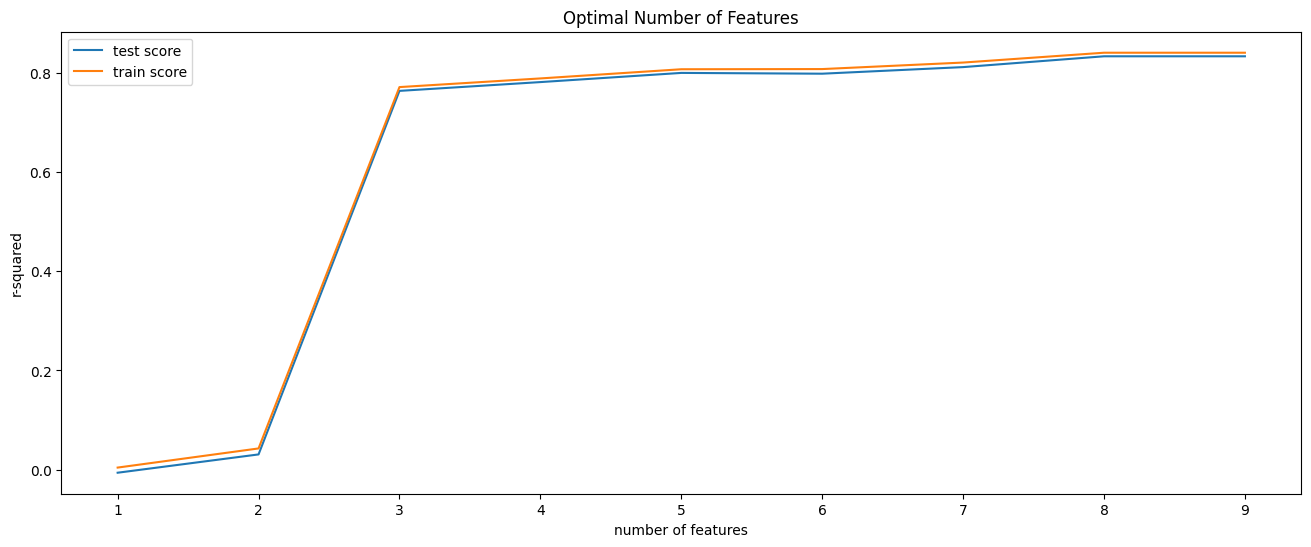

In [178]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [179]:
model_cv.best_params_

{'n_features_to_select': 8}

In [180]:
# final model
n_features_optimal = 8

lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [181]:
rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, Y_train)

In [183]:
# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = r2_score(Y_test, y_pred)
print(r2)
print('\n')
y_pred1 = rfe.predict(X_test)
r2_1 = r2_score(Y_test, y_pred1)
print(r2_1)

0.8580498155968792


0.8580498155968792


In [184]:
y_pred1

array([[10914.36099744],
       [11478.19950487],
       [13320.32870462],
       [ 7595.6235371 ],
       [10049.05371578],
       [ 8867.9060464 ],
       [ 6381.45804655],
       [16898.19371866],
       [11709.18888211],
       [10681.761832  ],
       [ 6556.32481778],
       [10018.21256321],
       [11576.76661929],
       [ 9715.09046826],
       [11705.62714603],
       [16777.39052751],
       [12264.89411292],
       [ 9501.14671017],
       [14303.43649556],
       [ 6467.00003046],
       [10560.82758152],
       [ 5701.52564016],
       [11079.54672474],
       [11712.57368944],
       [19270.41688116],
       [ 9553.59052612],
       [13473.95459628],
       [ 5944.12057964],
       [ 8416.4931022 ],
       [ 7632.86080558],
       [10899.11964242],
       [ 9598.70160244],
       [16274.53589142],
       [ 7020.38947597],
       [11571.16616354],
       [14069.79841667],
       [10223.87962785],
       [13023.20006958],
       [ 7678.31909443],
       [10393.41667915],


In [185]:
cv_lm_grid = model_cv.best_estimator_
cv_lm_grid

RFE(estimator=LinearRegression(), n_features_to_select=8)

# Problem - 2

### 2.	Perform multilinear regression with price as the output variable and document the different RMSE values.

In [370]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import sidetable as stb

from feature_engine.outliers import Winsorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MaxAbsScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold

from sklearn.linear_model import LinearRegression

from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

import joblib,pickle

In [371]:
df = pd.read_csv(r"D:\360 Data Science 360DigiTMG\Day31-Multiple Linear Regression\Datasets_MLR\Computer_Data.csv")
df

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1
...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,no,no,yes,39,35
6255,6256,2223,66,850,16,15,yes,yes,yes,39,35
6256,6257,2654,100,1200,24,15,yes,no,yes,39,35
6257,6258,2195,100,850,16,15,yes,no,yes,39,35


In [372]:
df.drop(columns=['Unnamed: 0'],axis=1, inplace=True)

In [373]:
df.columns

Index(['price', 'speed', 'hd', 'ram', 'screen', 'cd', 'multi', 'premium',
       'ads', 'trend'],
      dtype='object')

In [374]:
#seperating x and y variable
X = pd.DataFrame(df.iloc[:, 1:])
y = pd.DataFrame(df.iloc[:,0])

In [375]:
X.head()

,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,25,80,4,14,no,no,yes,94,1
1,33,85,2,14,no,no,yes,94,1
2,25,170,4,15,no,no,yes,94,1
3,25,170,8,14,no,no,no,94,1
4,33,340,16,14,no,no,yes,94,1


In [376]:
y.head()

,price
0,1499
1,1795
2,1595
3,1849
4,3295


In [377]:
#seperating numeric and categorical variable
num_feat = X.select_dtypes(exclude=['object']).columns
print(num_feat)
print('\n')
cate_feat = X.select_dtypes(include=['object']).columns
print(cate_feat)

Index(['speed', 'hd', 'ram', 'screen', 'ads', 'trend'], dtype='object')


Index(['cd', 'multi', 'premium'], dtype='object')


In [378]:
from sklearn.impute import SimpleImputer
#checking for null values
#creating pipeline for missing values
num_pipeline = Pipeline(steps=[('impute',SimpleImputer())])
preprocessor = ColumnTransformer(transformers=[('impute', num_pipeline, num_feat)])

In [379]:
imputation = preprocessor.fit(X)
#saving the pipeline
joblib.dump(imputation, 'meanimpute')

['meanimpute']

In [380]:
clean_data = pd.DataFrame(imputation.transform(X), columns=num_feat)
clean_data

,speed,hd,ram,screen,ads,trend
0,25.0,80.0,4.0,14.0,94.0,1.0
1,33.0,85.0,2.0,14.0,94.0,1.0
2,25.0,170.0,4.0,15.0,94.0,1.0
3,25.0,170.0,8.0,14.0,94.0,1.0
4,33.0,340.0,16.0,14.0,94.0,1.0
...,...,...,...,...,...,...
6254,100.0,528.0,8.0,15.0,39.0,35.0
6255,66.0,850.0,16.0,15.0,39.0,35.0
6256,100.0,1200.0,24.0,15.0,39.0,35.0
6257,100.0,850.0,16.0,15.0,39.0,35.0


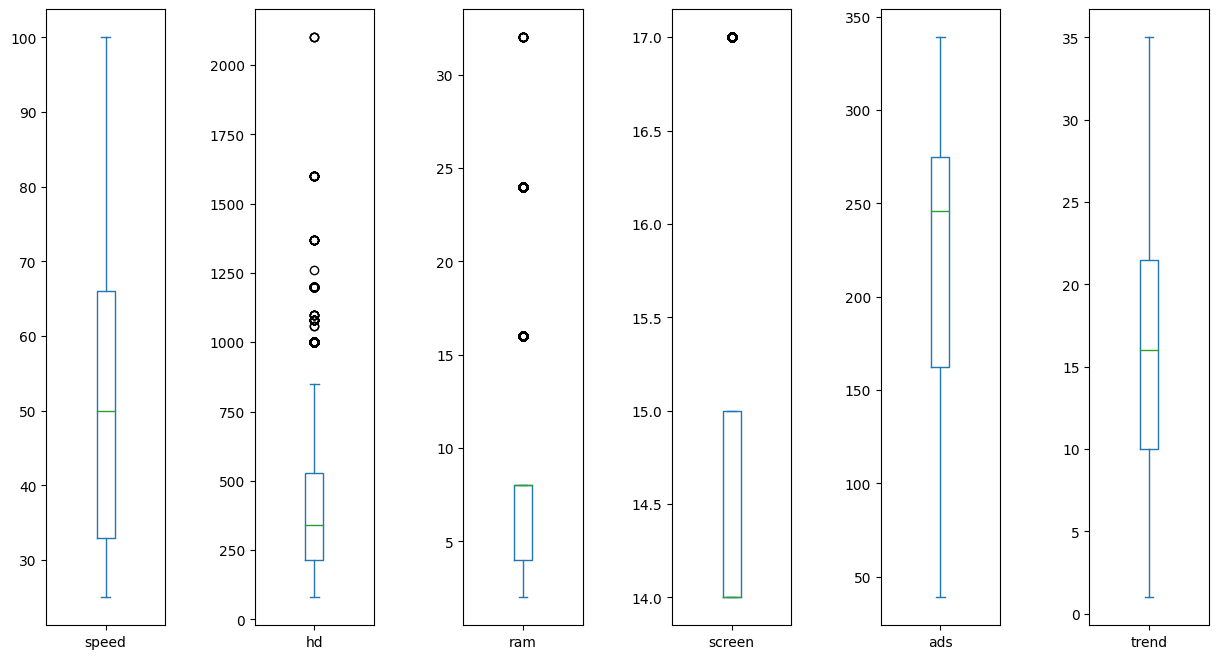

In [381]:
#checking for outliers
X.plot(kind='box',subplots=True, sharey=False, figsize=(15,8))
plt.subplots_adjust(wspace=0.75)
plt.show()

In [382]:
winsor = Winsorizer(capping_method='iqr',tail='both',fold=1.5, variables=list(clean_data.columns))
winsor

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['speed', 'hd', 'ram', 'screen', 'ads', 'trend'])

In [383]:
clean = winsor.fit(clean_data)
#save the pipeline
joblib.dump(clean, 'winsor')

['winsor']

In [384]:
clean_data1 = clean.transform(clean_data)

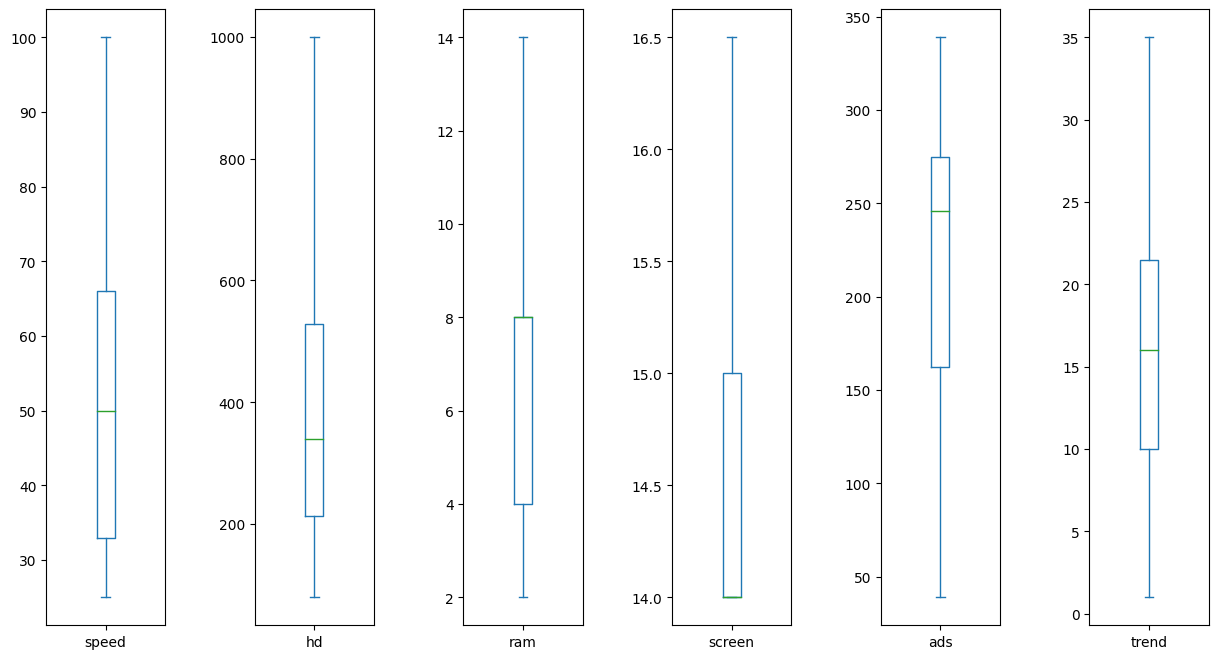

In [385]:
#after outlier treatment
clean_data1.plot(kind='box',subplots=True, sharey=False, figsize=(15,8))
plt.subplots_adjust(wspace=0.75)
plt.show()

In [386]:
#scaling with minmax sacler
scale = Pipeline([('scale', MinMaxScaler())])
sc_preprocessor = ColumnTransformer([('scale', scale, num_feat)])

In [387]:
scaled = sc_preprocessor.fit(clean_data1)
#saving the pipeline
joblib.dump(scaled, 'minmax')

['minmax']

In [388]:
scaled_data = pd.DataFrame(scaled.transform(clean_data1), columns=num_feat)
scaled_data

,speed,hd,ram,screen,ads,trend
0,0.000000,0.000000,0.166667,0.0,0.183333,0.0
1,0.106667,0.005441,0.000000,0.0,0.183333,0.0
2,0.000000,0.097933,0.166667,0.4,0.183333,0.0
3,0.000000,0.097933,0.500000,0.0,0.183333,0.0
4,0.106667,0.282916,1.000000,0.0,0.183333,0.0
...,...,...,...,...,...,...
6254,1.000000,0.487486,0.500000,0.4,0.000000,1.0
6255,0.546667,0.837867,1.000000,0.4,0.000000,1.0
6256,1.000000,1.000000,1.000000,0.4,0.000000,1.0
6257,1.000000,0.837867,1.000000,0.4,0.000000,1.0


In [389]:
#ceating instance of onehot encoder
encode_pipe = Pipeline([('onehot', OneHotEncoder())])
encode_processor = ColumnTransformer([('categorical', encode_pipe, cate_feat)])

In [390]:
encoder = encode_processor.fit(X)

joblib.dump(encoder, 'encode')

['encode']

In [391]:
encode_data = pd.DataFrame(encoder.transform(X))
encode_data

,0,1,2,3,4,5
0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...
6254,1.0,0.0,1.0,0.0,0.0,1.0
6255,0.0,1.0,0.0,1.0,0.0,1.0
6256,0.0,1.0,1.0,0.0,0.0,1.0
6257,0.0,1.0,1.0,0.0,0.0,1.0


In [392]:
clean_data = pd.concat([scaled_data,encode_data],axis=1)
clean_data

,speed,hd,ram,screen,ads,trend,0,1,2,3,4,5
0,0.000000,0.000000,0.166667,0.0,0.183333,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.106667,0.005441,0.000000,0.0,0.183333,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.000000,0.097933,0.166667,0.4,0.183333,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.000000,0.097933,0.500000,0.0,0.183333,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.106667,0.282916,1.000000,0.0,0.183333,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6254,1.000000,0.487486,0.500000,0.4,0.000000,1.0,1.0,0.0,1.0,0.0,0.0,1.0
6255,0.546667,0.837867,1.000000,0.4,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0
6256,1.000000,1.000000,1.000000,0.4,0.000000,1.0,0.0,1.0,1.0,0.0,0.0,1.0
6257,1.000000,0.837867,1.000000,0.4,0.000000,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [393]:
clean_data.describe().T

,count,mean,std,min,25%,50%,75%,max
speed,6259.0,0.360147,0.282103,0.0,0.106667,0.333333,0.546667,1.0
hd,6259.0,0.360673,0.263520,0.0,0.145811,0.282916,0.487486,1.0
ram,6259.0,0.454013,0.324989,0.0,0.166667,0.500000,0.500000,1.0
screen,6259.0,0.224125,0.312291,0.0,0.000000,0.000000,0.400000,1.0
ads,6259.0,0.607670,0.249451,0.0,0.411667,0.690000,0.786667,1.0
trend,6259.0,0.439029,0.231588,0.0,0.264706,0.441176,0.602941,1.0
0,6259.0,0.535389,0.498786,0.0,0.000000,1.000000,1.000000,1.0
1,6259.0,0.464611,0.498786,0.0,0.000000,0.000000,1.000000,1.0
2,6259.0,0.860521,0.346474,0.0,1.000000,1.000000,1.000000,1.0
3,6259.0,0.139479,0.346474,0.0,0.000000,0.000000,0.000000,1.0


In [394]:
# VIF for clean Data
P = add_constant(clean_data)
vif=pd.Series([variance_inflation_factor(P.values, i) for i in range(P.shape[1])], index=P.columns)
vif

const     0.000000e+00
speed     1.269744e+00
hd        3.854535e+00
ram       2.681578e+00
screen    1.100333e+00
ads       1.210282e+00
trend     2.098408e+00
0         1.667369e+05
1         7.402174e+06
2         1.269692e+05
3         6.363861e+08
4         8.203927e+07
5         1.295365e+04
dtype: float64

In [395]:
df_cor = clean_data.corr()
pd.DataFrame(np.linalg.inv(clean_data.corr().values), index = df_cor.index, columns=df_cor.columns)

,speed,hd,ram,screen,ads,trend,0,1,2,3,4,5
speed,1.269912,-0.107543,-0.093487,-0.117564,0.086539,-0.361757,-4.757532e-02,-8.699949e-02,-1.005393e-01,-3.069184e-02,-3.011499e-01,-4.011545e-01
hd,-0.107543,3.854617,-2.221584,-0.065646,0.348648,-1.430225,1.568262e+00,1.164633e+00,7.218937e-01,9.912582e-01,-5.748825e-01,-6.470570e-01
ram,-0.093487,-2.221584,2.681628,-0.168742,-0.080022,0.880900,-9.065583e-01,-1.343944e+00,-7.289702e-01,-6.388324e-01,8.691135e-01,7.824530e-01
screen,-0.117564,-0.065646,-0.168742,1.100338,0.013983,-0.102123,4.018898e-02,5.083876e-02,-6.400690e-02,-2.133563e-02,2.069556e-01,2.517605e-01
ads,0.086539,0.348648,-0.080022,0.013983,1.211660,0.267286,2.395148e-01,-3.564437e-02,2.210466e+00,2.247540e+00,-3.703009e-01,-2.181881e-01
trend,-0.361757,-1.430225,0.880900,-0.102123,0.267286,2.099842,-2.431902e+00,-2.906419e+00,-5.694209e+00,-5.872153e+00,-2.671941e+00,-2.476388e+00
0,0.006718,1.477076,-0.905907,0.009965,0.102226,-2.249575,-8.676979e+14,-8.676979e+14,-4.742560e+14,-4.742560e+14,2.345625e+13,2.345625e+13
1,-0.031603,1.075781,-1.315543,0.018178,-0.164784,-2.692839,-8.676979e+14,-8.676979e+14,-4.742560e+14,-4.742560e+14,2.345625e+13,2.345625e+13
2,0.016512,0.976311,-0.984190,-0.082199,2.112493,-5.934969,-5.585519e+14,-5.585519e+14,-2.374945e+15,-2.374945e+15,5.629500e+14,5.629500e+14
3,0.029149,1.226528,-0.903279,-0.044839,2.150741,-6.080464,-5.585519e+14,-5.585519e+14,-2.374945e+15,-2.374945e+15,5.629500e+14,5.629500e+14


In [396]:
import warnings
warnings.filterwarnings('ignore')

In [397]:
# Splitting data into training and testing data set

X_train, X_test, Y_train, Y_test = train_test_split(clean_data, y, test_size = 0.2, random_state = 0) 

In [398]:
## Build the best model Model building with out cv
model = sm.OLS(Y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     1855.
Date:                Sat, 07 Jan 2023   Prob (F-statistic):               0.00
Time:                        16:14:44   Log-Likelihood:                -35270.
No. Observations:                5007   AIC:                         7.056e+04
Df Residuals:                    4997   BIC:                         7.062e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
speed        640.1459     15.625     40.970      0.000     609.515     670.777
hd           942.7183     29.301     32.173      0.000     885.275    1000.162
ram          750.8587     19.751     38.016      0.000     712.137     789.580
screen       332.9794     13.130     25.361      0.000     307.239     358.719
ads          179.3943     17.302     10.368      0.000     145.475     213.314
trend      -1761.1335     24.697    -71.308      0.000   -1809.551   -1712.716
0            698.2592      6.985     99.969      0.000     684.566     711.952
1            732.2800      9.911     73.888      0.000     712.851     751.709
2            662.1676      8.313     79.654      0.000     645.870     678.465
3            768.3716     10.101     76.068      0.000     748.569     788.174
4            976.3638     11.290     86.478      0.000     954.230     998.498
5            454.1754      7.581     59.907      0.000     439.313     469.038
==============================================================================
Omnibus:                      826.252   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2587.210
Skew:                           0.845   Prob(JB):                         0.00
Kurtosis:                       6.089   Cond. No.                     8.07e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.5e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [399]:
# Predicting upon X_train
ytrain_pred = model.predict(X_train)
r_squared_train = r2_score(Y_train, ytrain_pred)
r_squared_train

0.7696680926349853

In [400]:
# Train residual values
train_resid  = Y_train.price - ytrain_pred
# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid * train_resid))
train_rmse

277.3166324895907

In [401]:
# Predicting upon X_test - validate the model for right fit
y_pred = model.predict(X_test)

# checking the Accurarcy by using r2_score
r_squared = r2_score(Y_test, y_pred)
r_squared

0.7869931109763468

In [402]:
# Test residual values
test_resid  = Y_test.price - y_pred
# RMSE value for train data 
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
test_rmse

273.1407425338493

### Training Error and Test Error is somewhat equal then we can say it is right fit.
### So this model can be accepted